[Reference](https://medium.com/@agbaoyeadedeji78/diabetes-prediction-using-machine-learning-classification-approaches-a-capstone-project-by-team-cbd0b784a30b)

In [1]:
# For numerical operations, data manipulation and array handling
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For importing normalization and classifier features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint, uniform
!pip install xgboost
import xgboost as xgb

# For evaluating metrics on models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# To clear all warnning dialogs
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Osadiapet/Diabetes-Prediction/refs/heads/main/diabetes.csv")

df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [3]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Outcome')


# Measures of central tendency
mean = df[numerical_cols].mean().round(3)
median = df[numerical_cols].median().round(3)
mode = df[numerical_cols].mode().iloc[0].round(3)

# Measures of central dispersion
variance = df[numerical_cols].var().round(3)
std_dev = df[numerical_cols].std().round(3)
range_ = df[numerical_cols].max() - df[numerical_cols].min()

# Quantiles
Q1 = df[numerical_cols].quantile(0.25).round(3)
Q2= df[numerical_cols].quantile(0.50).round(3)
Q3 = df[numerical_cols].quantile(0.75).round(3)

#Interquartile range
IQR = Q3 - Q1

# Minimum and Maximum
min_ = df[numerical_cols].min()
max_ = df[numerical_cols].max()

# Skewness and kurtosis
skewness = df[numerical_cols].skew().round(3)
kurtosis = df[numerical_cols].kurtosis().round(3)

# Combine into a single DataFrame for better readability
stats_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Mode': mode, 'Variance': variance, 'Std Dev': std_dev, 'Range': range_, 'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'IQR': IQR, 'Min': min_, 'Max': max_, 'Skewness': skewness, 'Kurtosis': kurtosis})

# Transpose
stats_df.T

Pregnancies   Glucose  BloodPressure  SkinThickness    Insulin  \
Mean            3.845   120.895         69.105         20.536     79.799   
Median          3.000   117.000         72.000         23.000     30.500   
Mode            1.000    99.000         70.000          0.000      0.000   
Variance       11.354  1022.248        374.647        254.473  13281.180   
Std Dev         3.370    31.973         19.356         15.952    115.244   
Range          17.000   199.000        122.000         99.000    846.000   
Q1              1.000    99.000         62.000          0.000      0.000   
Q2              3.000   117.000         72.000         23.000     30.500   
Q3              6.000   140.250         80.000         32.000    127.250   
IQR             5.000    41.250         18.000         32.000    127.250   
Min             0.000     0.000          0.000          0.000      0.000   
Max            17.000   199.000        122.000         99.000    846.000   
Skewness        0.902     0.174         -1.844          0.109      2.272   
Kurtosis        0.159     0.641          5.180         -0.520      7.214   

             BMI  DiabetesPedigreeFunction      Age  
Mean      31.993                     0.472   33.241  
Median    32.000                     0.372   29.000  
Mode      32.000                     0.254   22.000  
Variance  62.160                     0.110  138.303  
Std Dev    7.884                     0.331   11.760  
Range     67.100                     2.342   60.000  
Q1        27.300                     0.244   24.000  
Q2        32.000                     0.372   29.000  
Q3        36.600                     0.626   41.000  
IQR        9.300                     0.382   17.000  
Min        0.000                     0.078   21.000  
Max       67.100                     2.420   81.000  
Skewness  -0.429                     1.920    1.130  
Kurtosis   3.290                     5.595    0.643

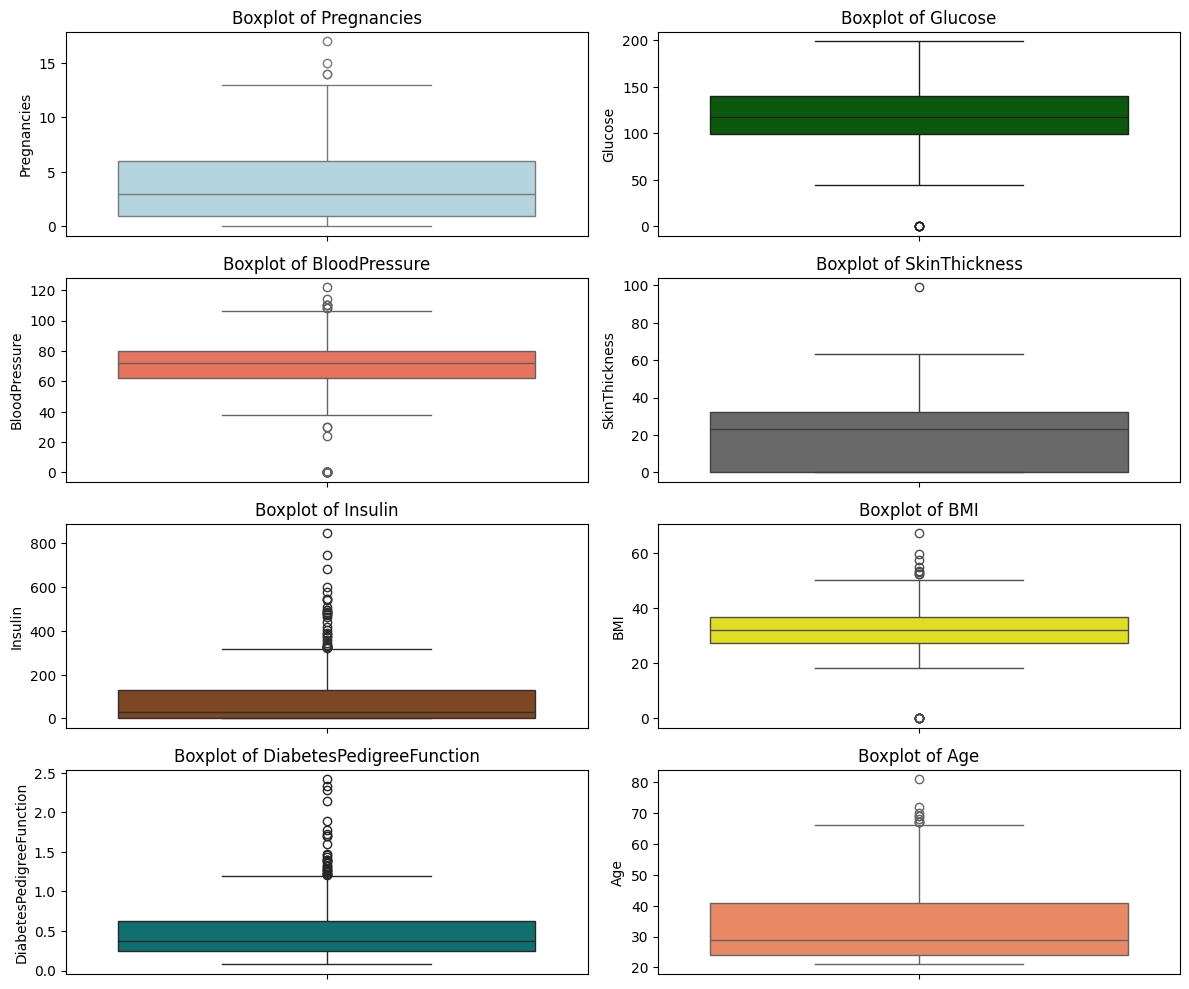

In [4]:
# List of colors to cycle through for the boxplots
colors = ['lightblue', 'darkgreen', 'tomato', 'dimgray', 'saddlebrown', 'yellow', 'teal', 'coral']

fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
  if i < len(colors):
        sns.boxplot(y=df[col], ax=axes[i], color=colors[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [5]:

# Making a DataFrame to give me more insights about my numerical values

summary_table = pd.DataFrame({
    'Dtype': df.dtypes,   # Dictionary is interior
    'Count': df.count(),
    'Unique': df.nunique(),
    'Null Values': df.isnull().sum(),
    'Zero Values': [
        (df[col] == 0).sum() for col in df.columns],
    'Frequent Value (and number of occurences)': [
        f"{df[col].mode()[0]} ({df[col].value_counts().max()})" for col in df.columns
    ]
})

summary_table

Dtype  Count  Unique  Null Values  Zero Values  \
Pregnancies                 int64    768      17            0          111   
Glucose                     int64    768     136            0            5   
BloodPressure               int64    768      47            0           35   
SkinThickness               int64    768      51            0          227   
Insulin                     int64    768     186            0          374   
BMI                       float64    768     248            0           11   
DiabetesPedigreeFunction  float64    768     517            0            0   
Age                         int64    768      52            0            0   
Outcome                     int64    768       2            0          500   

                         Frequent Value (and number of occurences)  
Pregnancies                                                1 (135)  
Glucose                                                    99 (17)  
BloodPressure                                              70 (57)  
SkinThickness                                              0 (227)  
Insulin                                                    0 (374)  
BMI                                                      32.0 (13)  
DiabetesPedigreeFunction                                 0.254 (6)  
Age                                                        22 (72)  
Outcome                                                    0 (500)

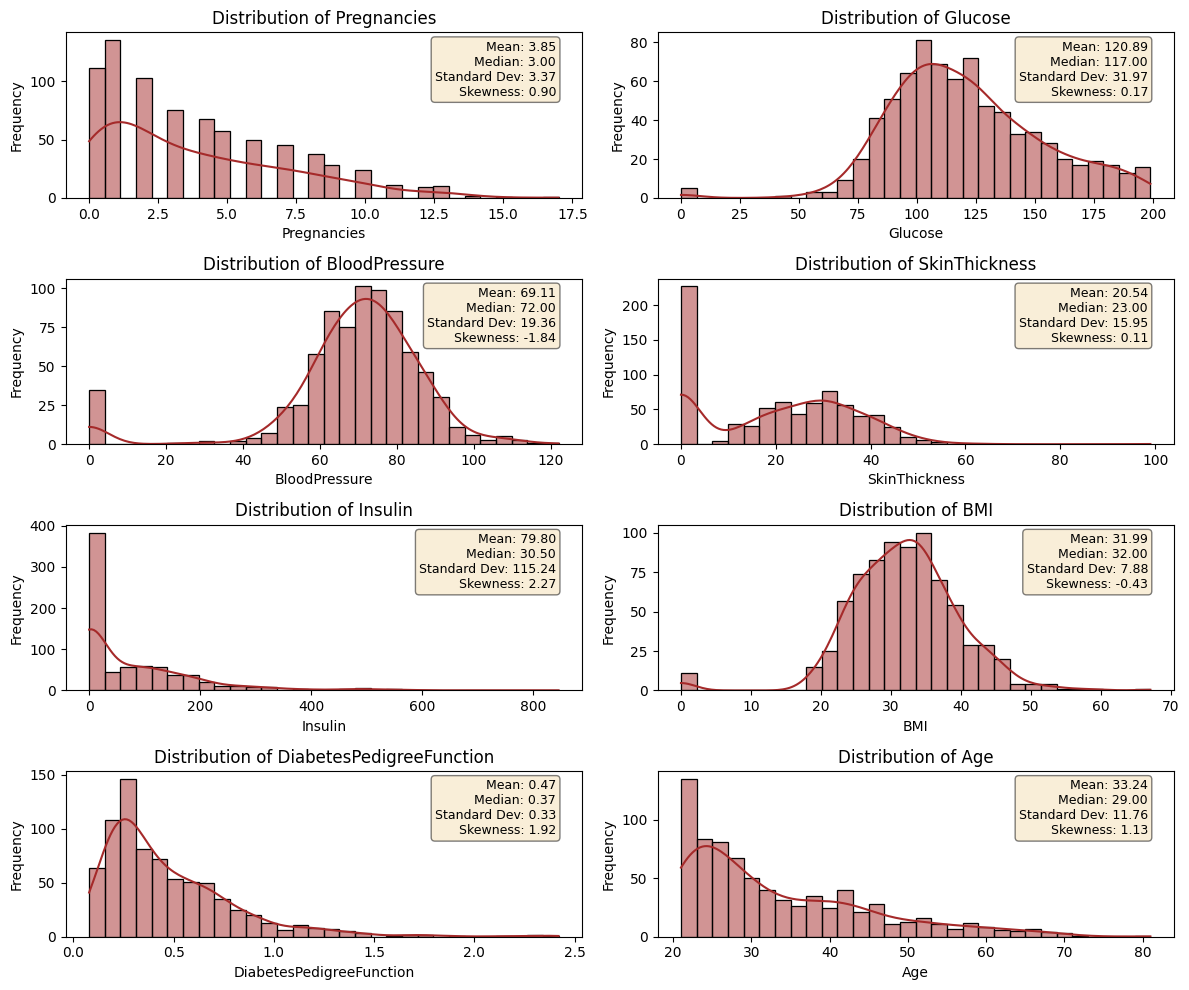

In [6]:
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten() # Flattening the 2D array of axes to 1D so iterand can be looped in one dimension

# Iterating through each numerical column (excluding 'Outcome') and plot the histogram
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='brown')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Adds text box with statistics
    stats_text = f"Mean: {mean[col]:.2f}\nMedian: {median[col]:.2f}\nStandard Dev: {std_dev[col]:.2f}\nSkewness: {skewness[col]:.2f}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right', bbox=props)


# Adjust layout
plt.tight_layout()
plt.show()

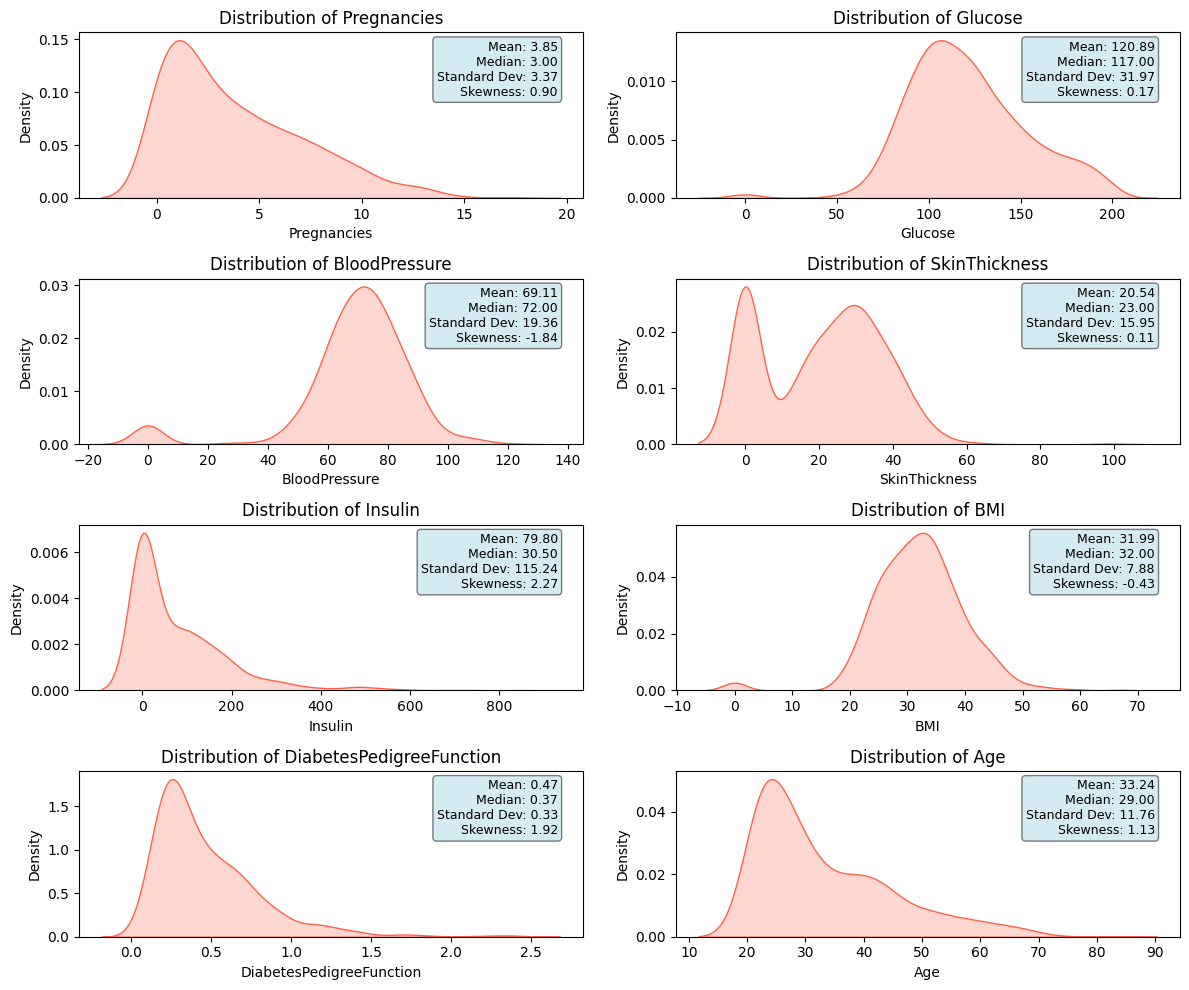

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten() # Flattening the 2D array of axes to 1D so iterand can be looped in one dimension

for i, col in enumerate(numerical_cols):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='tomato') # Changed histplot to kdeplot
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density') # Changed label to Density for KDE plot

    # Adds text box with statistics
    stats_text = f"Mean: {mean[col]:.2f}\nMedian: {median[col]:.2f}\nStandard Dev: {std_dev[col]:.2f}\nSkewness: {skewness[col]:.2f}"
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
    axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right', bbox=props)


plt.tight_layout()
plt.show()

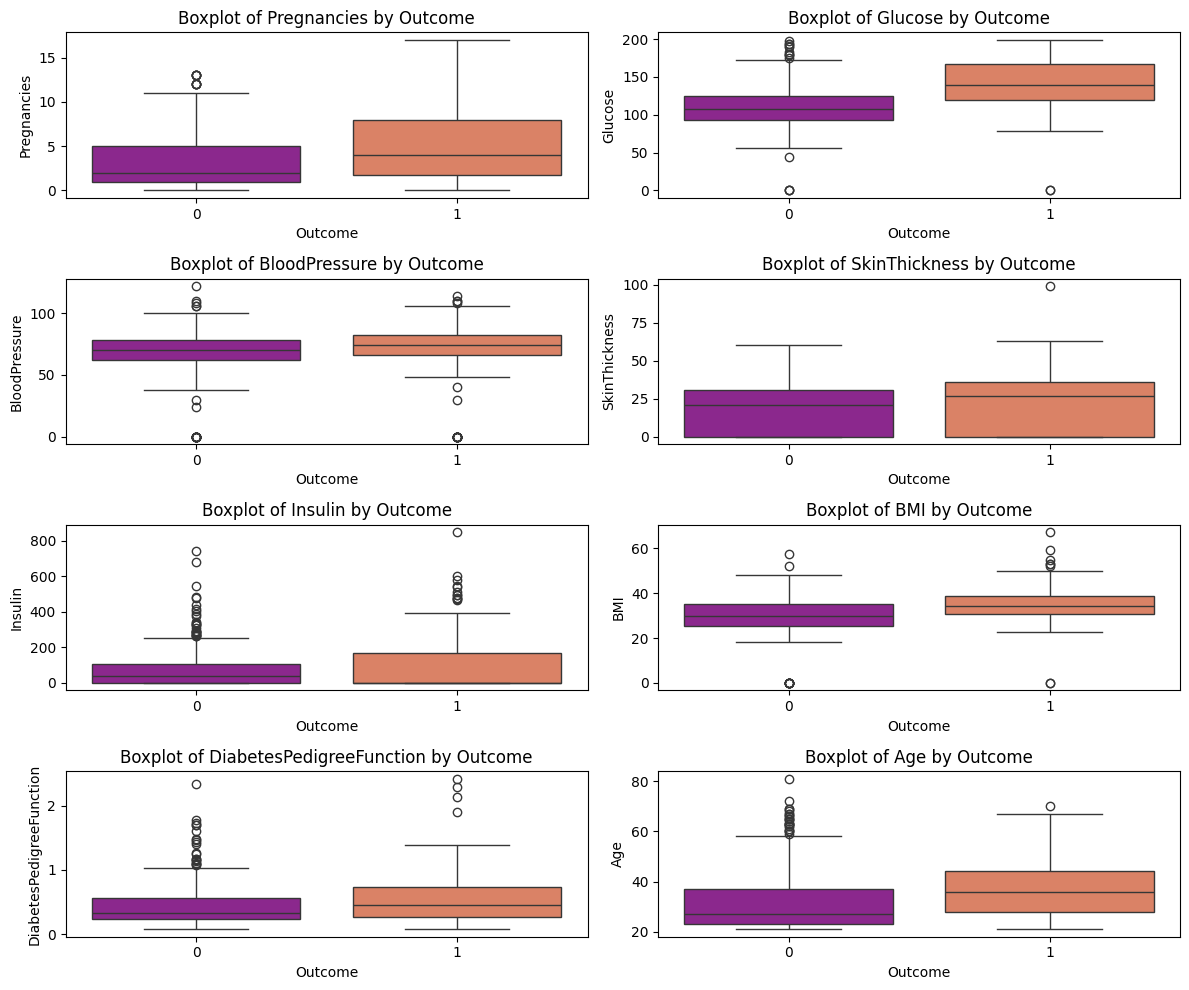

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten() # Flattening the 2D array of axes to 1D so iterand can be looped in one dimension

# Iterate through each numerical column (excluding 'Outcome') and plot the boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i], palette='plasma')
    axes[i].set_title(f'Boxplot of {col} by Outcome')
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
# Calculate the mean of each feature for each outcome group
mean_by_outcome = df.groupby('Outcome')[numerical_cols].mean().T

# Prepare data for plotting
mean_by_outcome['Feature'] = mean_by_outcome.index
mean_by_outcome_melted = mean_by_outcome.melt(id_vars='Feature', var_name='Outcome', value_name='MeanValue')


mean_by_outcome_melted

Feature Outcome   MeanValue
0                Pregnancies       0    3.298000
1                    Glucose       0  109.980000
2              BloodPressure       0   68.184000
3              SkinThickness       0   19.664000
4                    Insulin       0   68.792000
5                        BMI       0   30.304200
6   DiabetesPedigreeFunction       0    0.429734
7                        Age       0   31.190000
8                Pregnancies       1    4.865672
9                    Glucose       1  141.257463
10             BloodPressure       1   70.824627
11             SkinThickness       1   22.164179
12                   Insulin       1  100.335821
13                       BMI       1   35.142537
14  DiabetesPedigreeFunction       1    0.550500
15                       Age       1   37.067164

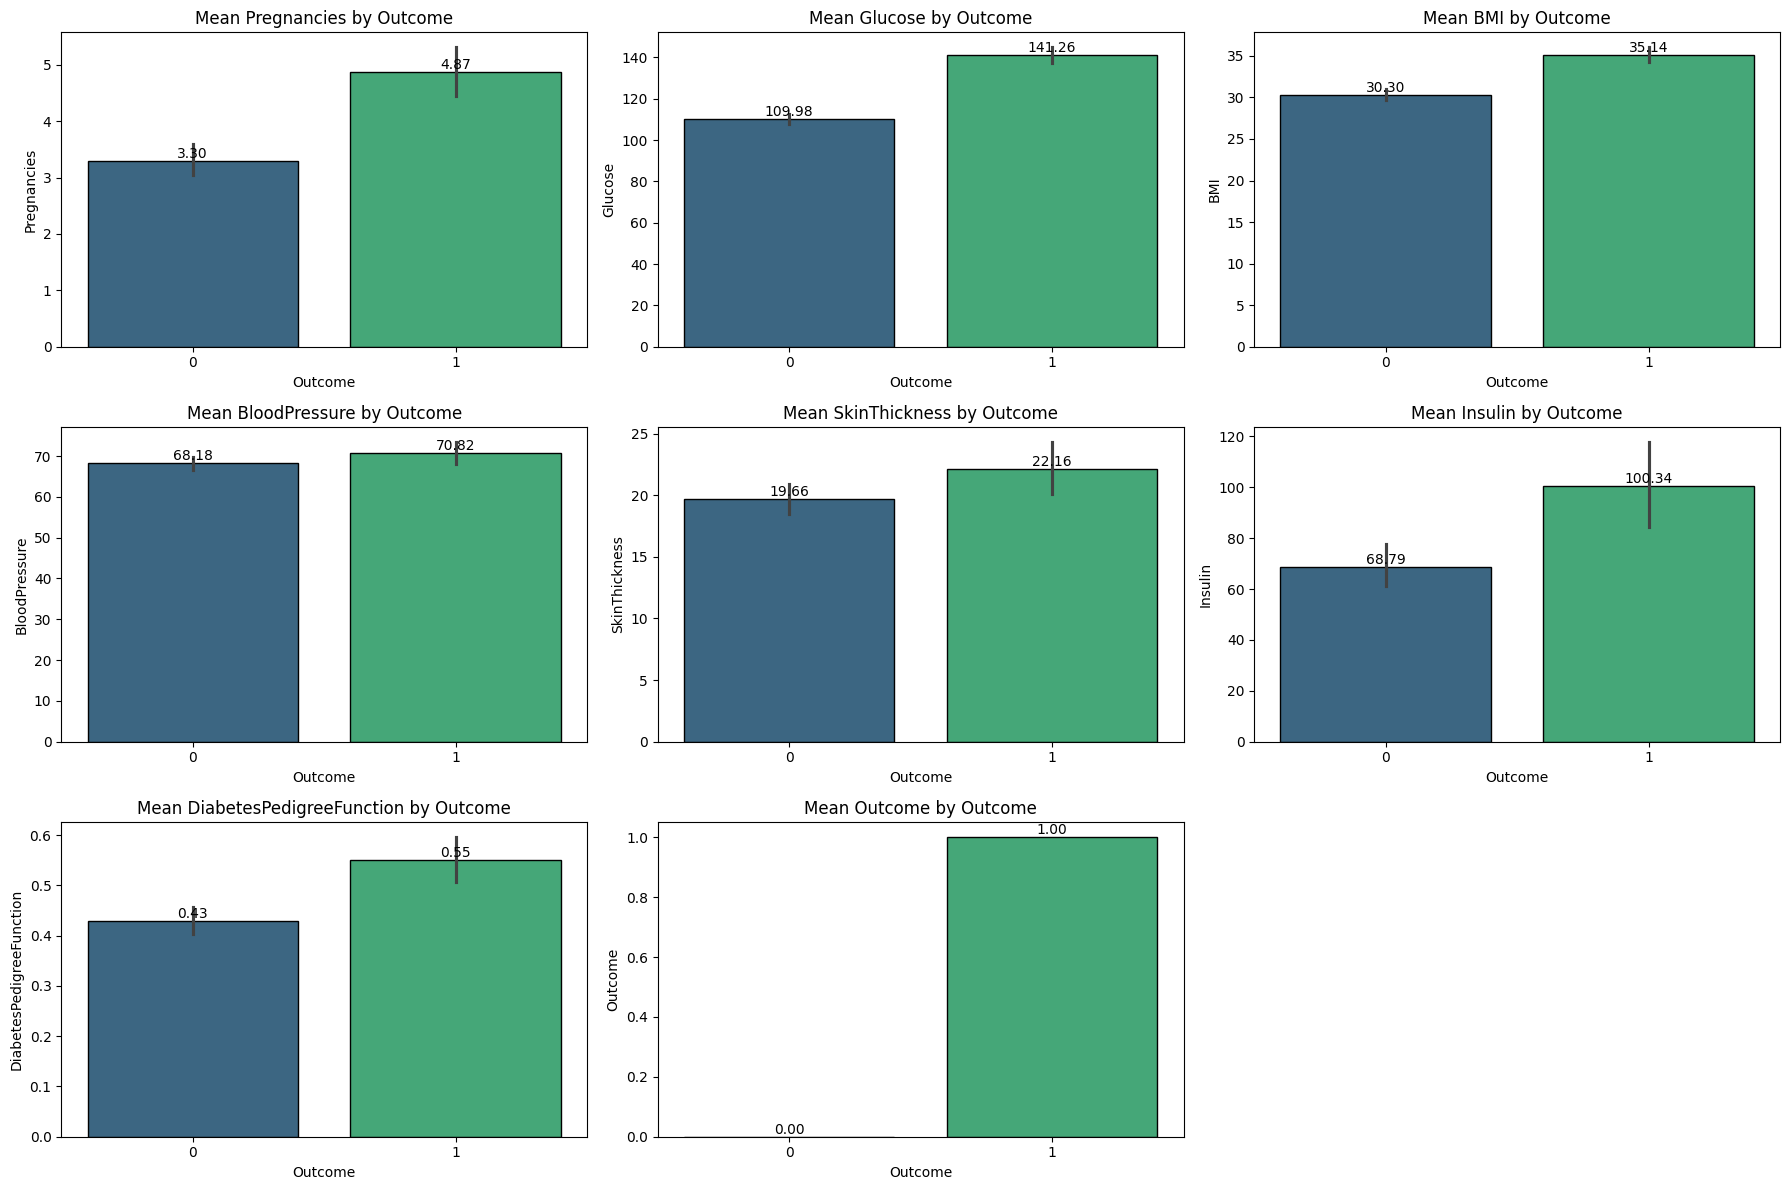

In [10]:
# Creating a figure and a grid of subplots (4 rows, 2 columns for bar charts, 4 rows, 2 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten() # Flattening the 2D array of axes to 1D so iterand can be looped in one dimension

cols = ['Pregnancies', 'Glucose', 'BMI', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome']

# Iterate through each numerical column
for i, col in enumerate(cols):
    # Bar Chart (left column of each pair)
    bar_ax = axes[i] # Get the axis for the bar chart i
    sns.barplot(x='Outcome', y=col, data=df, ax=bar_ax, palette='viridis', edgecolor='black')
    bar_ax.set_title(f'Mean {col} by Outcome')
    bar_ax.set_xlabel('Outcome')
    bar_ax.set_ylabel(col)

    # Add labels to the bars
    for container in bar_ax.containers:
        bar_ax.bar_label(container, fmt='%.2f')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

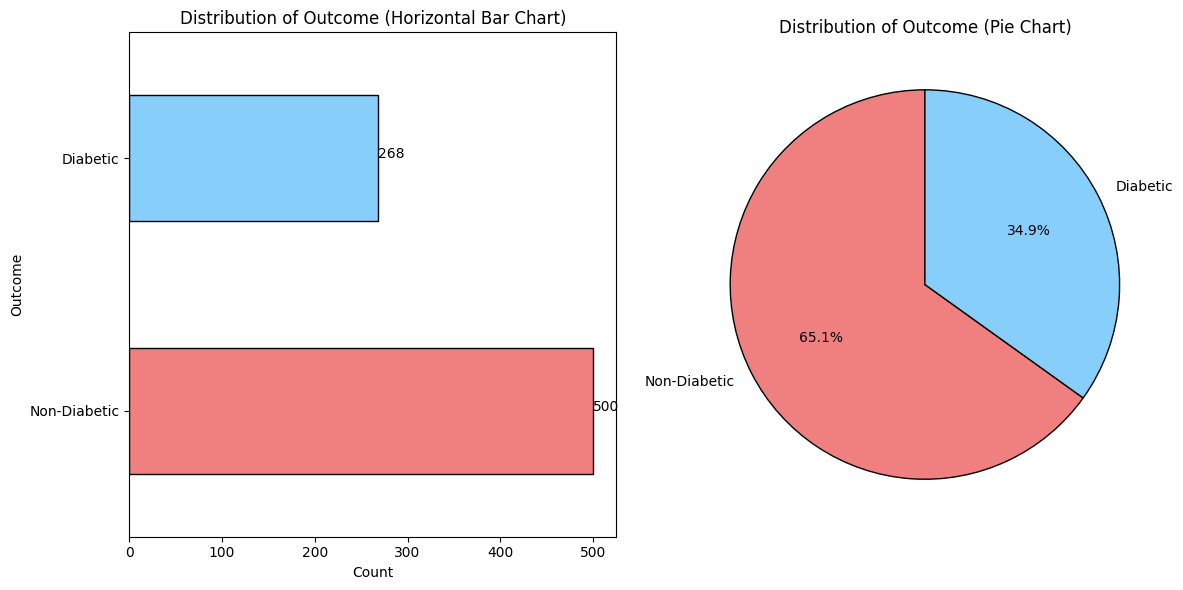

In [11]:
# Calculate the counts of each outcome
outcome_counts = df['Outcome'].value_counts()

# Create figure and axes for the grid
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


# Horizontal Bar Chart
outcome_counts.plot(kind='barh', ax=axes[0], color=['lightcoral', 'lightskyblue'], edgecolor='black')
axes[0].set_title('Distribution of Outcome (Horizontal Bar Chart)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Outcome')
axes[0].set_yticklabels(['Non-Diabetic', 'Diabetic'])

# Pie Chart
axes[1].pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'], wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Distribution of Outcome (Pie Chart)')



# Addding count labels to the bars
for index, value in enumerate(outcome_counts):
    axes[0].text(value, index, str(value))


# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

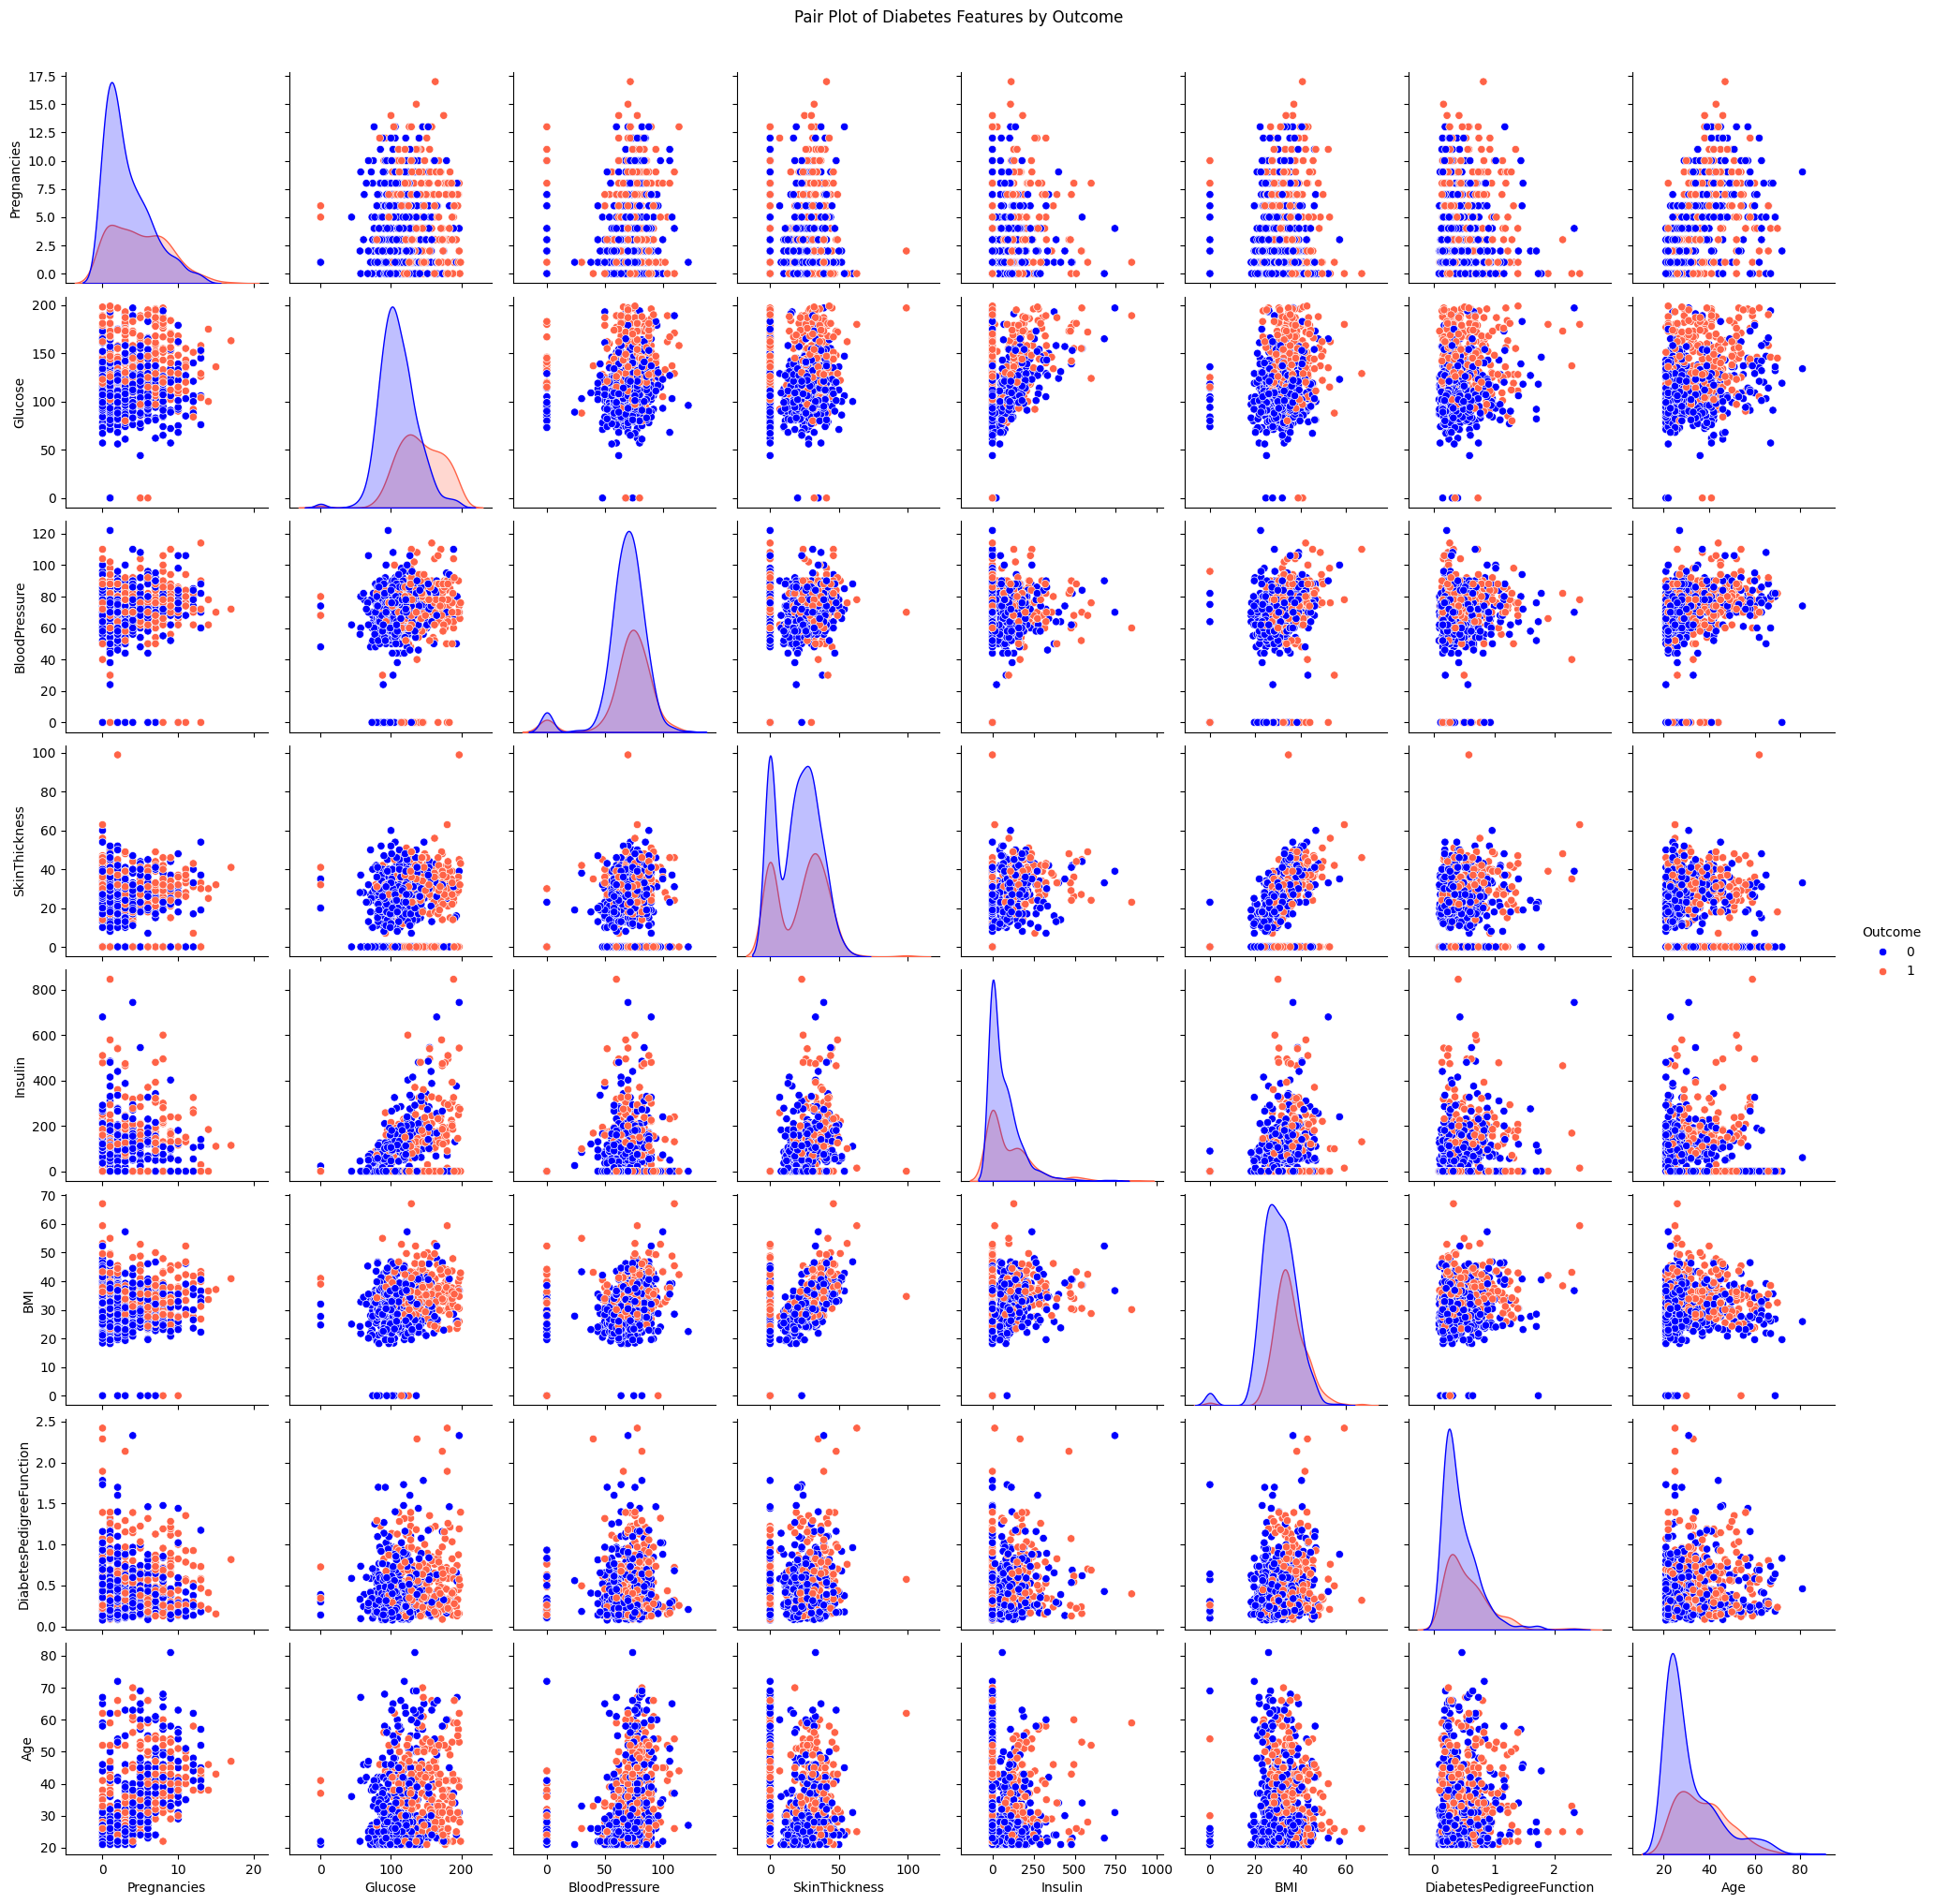

In [12]:
plt.figure(figsize=(10,6))

sns.pairplot(df, hue='Outcome', palette={0: 'blue', 1: 'tomato'})
plt.suptitle('Pair Plot of Diabetes Features by Outcome', y=1.02)
plt.show()

In [13]:
# Identify columns with zero values
zero_value_cols = summary_table[summary_table['Zero Values'] > 0].index.tolist()

print("Columns with zero values:")
for col in zero_value_cols:
  print(f"- {col}: {summary_table.loc[col, 'Zero Values']} zero values")

Columns with zero values:
- Pregnancies: 111 zero values
- Glucose: 5 zero values
- BloodPressure: 35 zero values
- SkinThickness: 227 zero values
- Insulin: 374 zero values
- BMI: 11 zero values
- Outcome: 500 zero values


In [14]:
columns_with_zeros = ['Glucose', 'BMI', 'Insulin', 'SkinThickness', 'BloodPressure']  #Replacing the impossble-zero values with their null values

for column in columns_with_zeros:
  df[column] = df[column].replace(0, np.nan)

df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [15]:
null_percentages = df.isnull().sum() / len(df) * 100
print("Percentage of null values in each column:")
print(null_percentages[null_percentages > 0])

Percentage of null values in each column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64


In [16]:
binomial_columns_with_zeros = ['Glucose', 'SkinThickness']  #Replacing the impossble-zero values with their null values - mean (nearly symettric)

for column in binomial_columns_with_zeros:
  df[column] = df[column].fillna(df[column].mean())

skewed_columns_with_zeros = ['BloodPressure', 'Insulin', 'BMI']  #Replacing the impossble-zero values with their null values - median (skewed)

for column in skewed_columns_with_zeros:
  df[column] = df[column].fillna(df[column].median())

df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0       35.00000    125.0  33.6   
1              1     85.0           66.0       29.00000    125.0  26.6   
2              8    183.0           64.0       29.15342    125.0  23.3   
3              1     89.0           66.0       23.00000     94.0  28.1   
4              0    137.0           40.0       35.00000    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0       48.00000    180.0  32.9   
764            2    122.0           70.0       27.00000    125.0  36.8   
765            5    121.0           72.0       23.00000    112.0  26.2   
766            1    126.0           60.0       29.15342    125.0  30.1   
767            1     93.0           70.0       31.00000    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

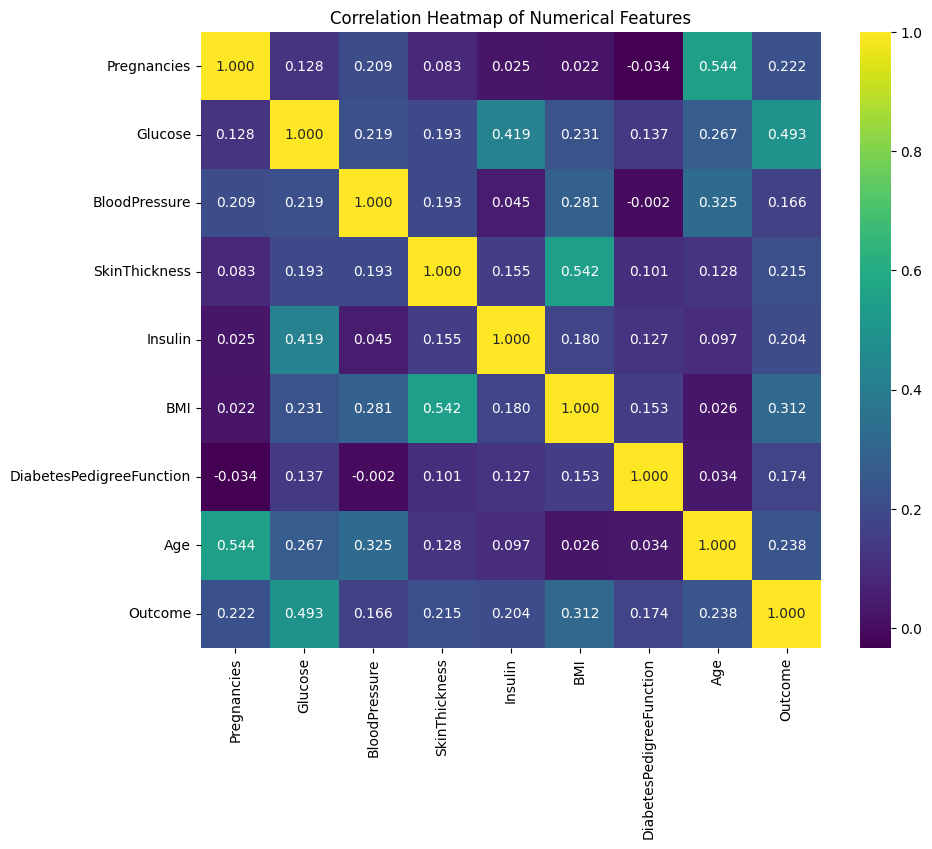

In [17]:
# Make a heatmap of correlations between numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".3f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [18]:
# Calculate correlations with the 'Outcome' column
correlations = df.select_dtypes(include=['number']).corr()['Outcome'].sort_values(ascending=False)

# Create a DataFrame from the correlations
correlation_table = pd.DataFrame({'Feature': correlations.index, 'Correlation with Outcome': correlations.values})
correlation_table = correlation_table[correlation_table['Feature'] != 'Outcome']

# Display the table
correlation_table.sort_values(by='Correlation with Outcome', ascending=False).reset_index()
correlation_table.set_index('Feature', inplace=True)
correlation_table

Correlation with Outcome
Feature                                           
Glucose                                   0.492928
BMI                                       0.312038
Age                                       0.238356
Pregnancies                               0.221898
SkinThickness                             0.215299
Insulin                                   0.203790
DiabetesPedigreeFunction                  0.173844
BloodPressure                             0.165723

In [19]:
# Making categorical attributes for Age, BMI, Blood Pressure - based on reliable healthcate stratifications

df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels= ['Young Adult', 'Early Middle Age', 'Late Middle Age', 'Early  Senior', 'Senior'])
df['BMI_Group'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['BloodPressure_Group'] = pd.cut(df['BloodPressure'], bins=[0, 60, 80, 90, 120, 200], labels=['Low', 'Normal', 'Pre-hypertension', 'Stage 1 Hypertension', 'Stage 2 Hypertension'])
df['Outcome_Group'] = df['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})

df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0       35.00000    125.0  33.6   
1              1     85.0           66.0       29.00000    125.0  26.6   
2              8    183.0           64.0       29.15342    125.0  23.3   
3              1     89.0           66.0       23.00000     94.0  28.1   
4              0    137.0           40.0       35.00000    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0       48.00000    180.0  32.9   
764            2    122.0           70.0       27.00000    125.0  36.8   
765            5    121.0           72.0       23.00000    112.0  26.2   
766            1    126.0           60.0       29.15342    125.0  30.1   
767            1     93.0           70.0       31.00000    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome          AgeGroup   BMI_Group  \
0                       0.627   50        1   Late Middle Age       Obese   
1                       0.351   31        0  Early Middle Age  Overweight   
2                       0.672   32        1  Early Middle Age      Normal   
3                       0.167   21        0       Young Adult  Overweight   
4                       2.288   33        1  Early Middle Age       Obese   
..                        ...  ...      ...               ...         ...   
763                     0.171   63        0            Senior       Obese   
764                     0.340   27        0       Young Adult       Obese   
765                     0.245   30        0       Young Adult  Overweight   
766                     0.349   47        1   Late Middle Age       Obese   
767                     0.315   23        0       Young Adult       Obese   

    BloodPressure_Group Outcome_Group  
0                Normal      Diabetes  
1                Normal   No Diabetes  
2                Normal      Diabetes  
3                Normal   No Diabetes  
4                   Low      Diabetes  
..                  ...           ...  
763              Normal   No Diabetes  
764              Normal   No Diabetes  
765              Normal   No Diabetes  
766                 Low      Diabetes  
767              Normal   No Diabetes  

[768 rows x 13 columns]

In [20]:
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome']
pivot_table = pd.pivot_table(df, values=numerical_cols, index=['AgeGroup', 'BMI_Group'], aggfunc='mean')
pivot_table

BloodPressure  DiabetesPedigreeFunction  \
AgeGroup         BMI_Group                                              
Young Adult      Underweight      69.500000                  0.413000   
                 Normal           66.304348                  0.340710   
                 Overweight       66.290000                  0.429510   
                 Obese            71.073770                  0.484488   
Early Middle Age Normal           69.411765                  0.597235   
                 Overweight       71.853659                  0.457585   
                 Obese            75.585859                  0.559535   
Late Middle Age  Normal           72.166667                  0.482500   
                 Overweight       77.210526                  0.539053   
                 Obese            77.715909                  0.431886   
Early  Senior    Normal           75.666667                  0.401750   
                 Overweight       77.333333                  0.492667   
                 Obese            82.393939                  0.585364   
Senior           Normal           65.000000                  0.557500   
                 Overweight       75.272727                  0.431636   
                 Obese            84.166667                  0.422750   

                                 Glucose     Insulin   Outcome  Pregnancies  \
AgeGroup         BMI_Group                                                    
Young Adult      Underweight   95.250000  114.250000  0.000000     0.750000   
                 Normal       102.589663  108.159420  0.014493     1.898551   
                 Overweight   111.316868  116.430000  0.120000     2.250000   
                 Obese        120.429044  149.459016  0.315574     1.959016   
Early Middle Age Normal       112.705882  126.647059  0.117647     4.823529   
                 Overweight   121.243902  122.829268  0.341463     5.219512   
                 Obese        131.764513  153.828283  0.606061     5.373737   
Late Middle Age  Normal       116.166667  113.500000  0.166667     8.333333   
                 Overweight   122.789474  128.105263  0.684211     7.526316   
                 Obese        127.314622  142.852273  0.568182     6.954545   
Early  Senior    Normal       128.250000  140.500000  0.250000     6.750000   
                 Overweight   141.888889  186.666667  0.444444     6.333333   
                 Obese        145.636364  215.303030  0.727273     6.484848   
Senior           Normal       114.250000  125.000000  0.000000     2.500000   
                 Overweight   139.363636  125.000000  0.090909     5.727273   
                 Obese        141.833333  129.583333  0.500000     4.833333   

                              SkinThickness  
AgeGroup         BMI_Group                   
Young Adult      Underweight      23.076710  
                 Normal           21.102440  
                 Overweight       22.982218  
                 Obese            32.238569  
Early Middle Age Normal           25.443188  
                 Overweight       27.007349  
                 Obese            32.923729  
Late Middle Age  Normal           22.884473  
                 Overweight       26.514058  
                 Obese            31.858217  
Early  Senior    Normal           25.531731  
                 Overweight       27.290409  
                 Obese            31.072145  
Senior           Normal           29.153420  
                 Overweight       28.915812  
                 Obese            35.089495

In [21]:
df['Glucose_Category'] = pd.cut(df['Glucose'], bins=[0, 140, 200], labels=['Normal', 'Impaired glucose tolerance'])

df[['Glucose', 'Glucose_Category']]

Glucose            Glucose_Category
0      148.0  Impaired glucose tolerance
1       85.0                      Normal
2      183.0  Impaired glucose tolerance
3       89.0                      Normal
4      137.0                      Normal
..       ...                         ...
763    101.0                      Normal
764    122.0                      Normal
765    121.0                      Normal
766    126.0                      Normal
767     93.0                      Normal

[768 rows x 2 columns]

In [22]:
glucose_outcome_counts = df.groupby(['Glucose_Category', 'Outcome_Group']).size().unstack(fill_value=0)
glucose_outcome_counts

Outcome_Group               Diabetes  No Diabetes
Glucose_Category                                 
Normal                           136          440
Impaired glucose tolerance       132           60

In [23]:
glucose_group_outcome_percentage = df.groupby('Glucose_Category')['Outcome_Group'].value_counts(normalize=True).unstack() * 100
glucose_group_outcome_percentage

Outcome_Group                Diabetes  No Diabetes
Glucose_Category                                  
Normal                      23.611111    76.388889
Impaired glucose tolerance  68.750000    31.250000

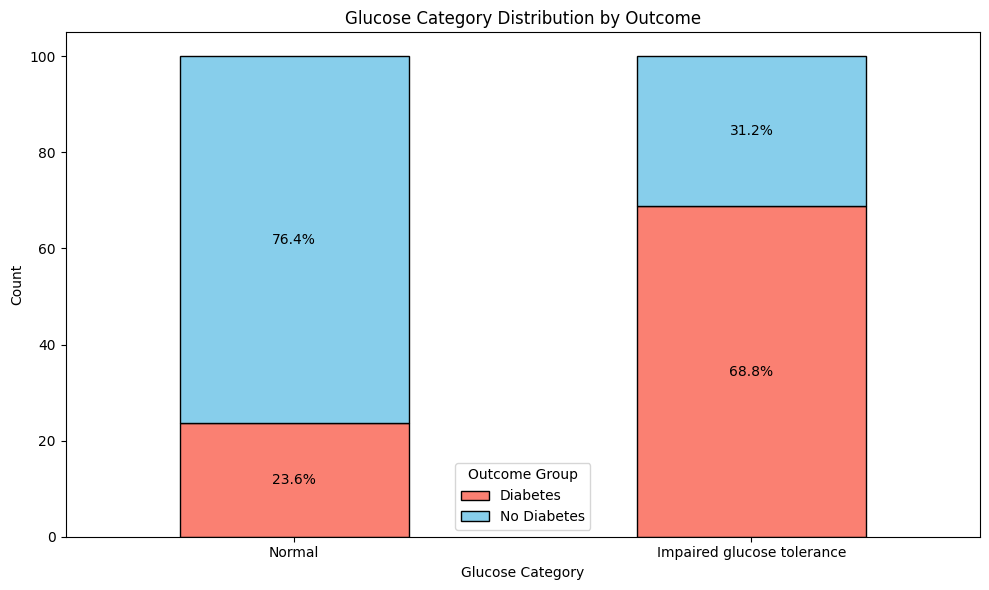

In [24]:
# Calculate the total count for each Glucose_Category for percentage calculation
glucose_totals = glucose_outcome_counts.sum(axis=1)

# Calculate the percentages

ax = glucose_group_outcome_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')

plt.title('Glucose Category Distribution by Outcome')
plt.xlabel('Glucose Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Outcome Group')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.tight_layout()
plt.show()

Outcome_Group     Diabetes  No Diabetes
AgeGroup                               
Young Adult             90          327
Early Middle Age        76           81
Late Middle Age         64           49
Early  Senior           31           23
Senior                   7           20


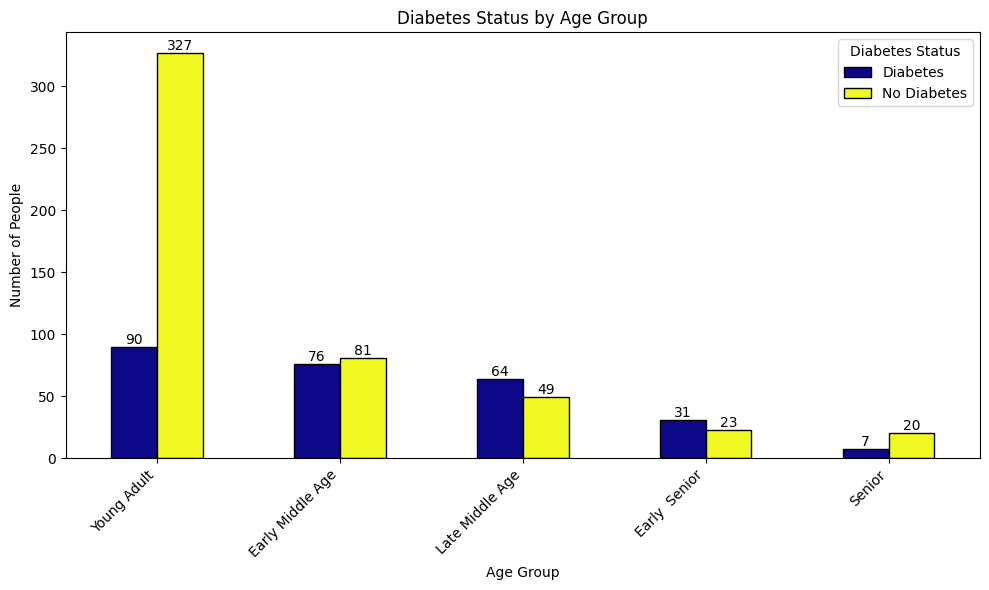

In [25]:
# Group by 'AgeGroup' and 'Outcome_Group', then count the occurrences
age_diabetes_group = df.groupby(['AgeGroup', 'Outcome_Group']).size().unstack(fill_value=0)

# Display the result
print(age_diabetes_group)

# Plotting the grouped data
ax = age_diabetes_group.plot(kind='bar', figsize=(10, 6), colormap='plasma', edgecolor='black')
plt.title('Diabetes Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diabetes Status')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.tight_layout()
plt.show()

In [26]:
# Filter for positive outcomes
positive_outcomes_df = df[df['Outcome'] == 1]

# Group by AgeGroup and count positive outcomes
age_group_counts = positive_outcomes_df['AgeGroup'].value_counts()
age_group_counts

AgeGroup
Young Adult         90
Early Middle Age    76
Late Middle Age     64
Early  Senior       31
Senior               7
Name: count, dtype: int64

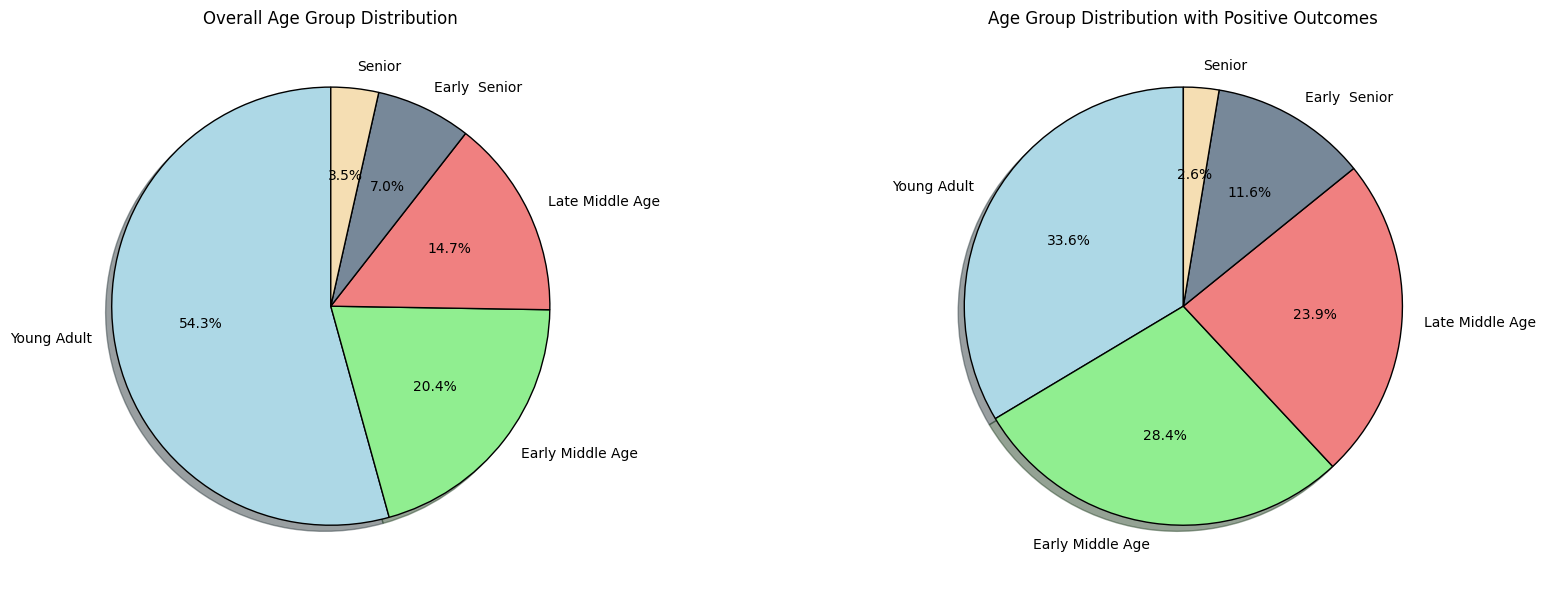

In [27]:
# Create the pie charts
plt.figure(figsize=(18, 6))

# Pie chart for overall age group distribution
plt.subplot(1, 2, 1)
df['AgeGroup'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightslategrey', 'wheat'], shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Overall Age Group Distribution')
plt.ylabel('')

# Pie chart for age group distribution with positive outcomes
plt.subplot(1, 2, 2)
age_group_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightslategrey', 'wheat'], shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Age Group Distribution with Positive Outcomes')
plt.ylabel('')


plt.tight_layout()
plt.show()

In [28]:
# Calculate the percentage of positive outcomes within each age group
age_group_outcome_percentage = df.groupby('AgeGroup')['Outcome'].value_counts(normalize=True).unstack() * 100 # Returns the proportions of each outcome within each group, instead of raw counts and unstacks the columns
age_group_outcome_percentage = age_group_outcome_percentage.rename(columns={0: 'No Diabetes', 1: 'Diabetes'})
age_group_outcome_percentage

Outcome           No Diabetes   Diabetes
AgeGroup                                
Young Adult         78.417266  21.582734
Early Middle Age    51.592357  48.407643
Late Middle Age     43.362832  56.637168
Early  Senior       42.592593  57.407407
Senior              74.074074  25.925926

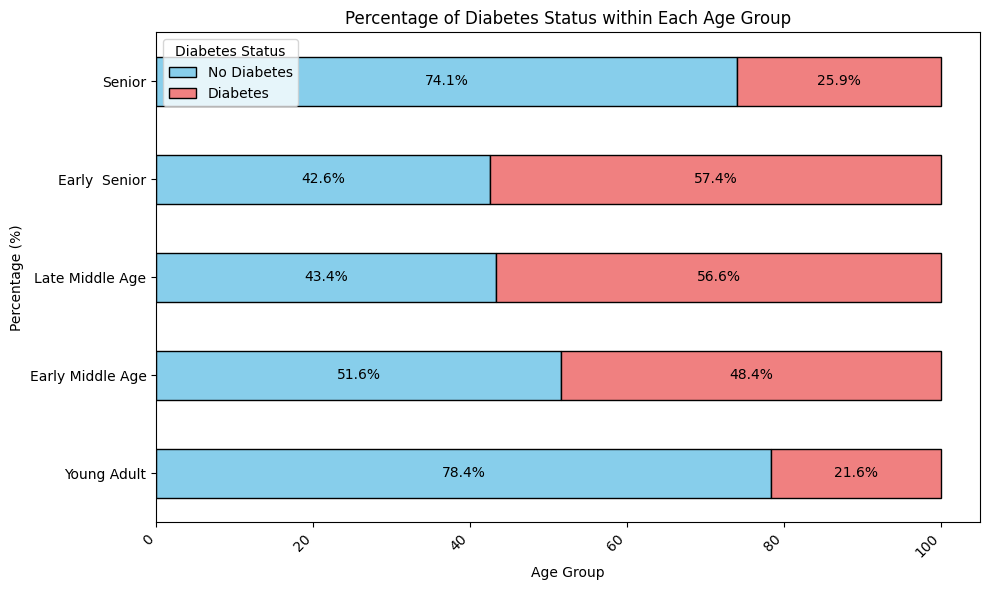

In [29]:
# Plotting the stacked bar chart for age_group_percentage
ax = age_group_outcome_percentage.plot(kind='barh', stacked=True, color=['skyblue', 'lightcoral'], edgecolor='black', figsize=(10, 6))
plt.title('Percentage of Diabetes Status within Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diabetes Status')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.tight_layout()
plt.show()

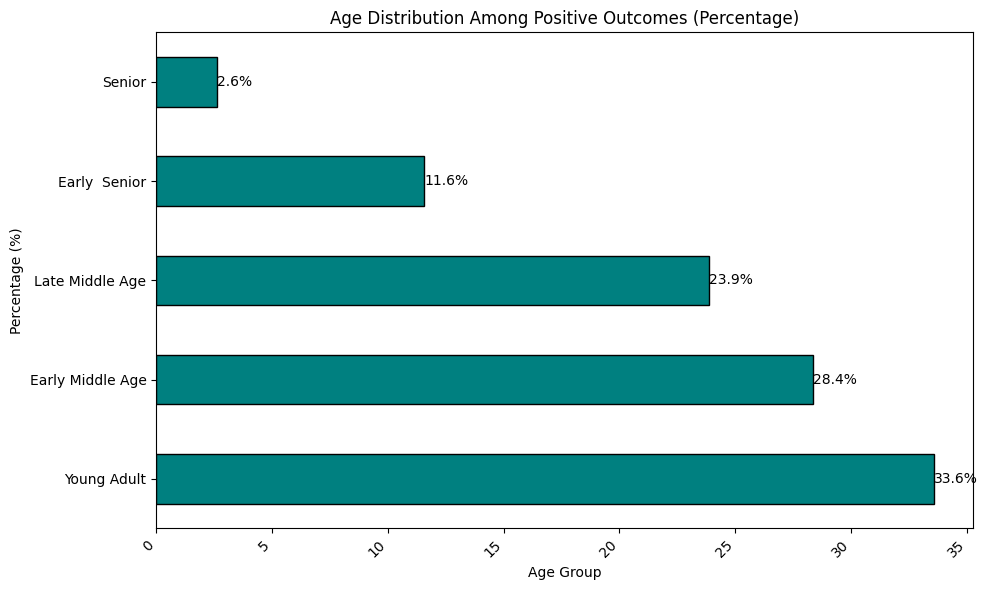

In [30]:
# Calculate the percentage distribution of AgeGroup among positive outcomes
positive_age_distribution = age_group_counts / age_group_counts.sum() * 100

plt.figure(figsize=(10, 6))
ax = positive_age_distribution.sort_index().plot(kind='barh', color='teal', edgecolor='black') # sort_index() ensures consistent order

plt.title('Age Distribution Among Positive Outcomes (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

In [31]:
# Calculate the percentage of positive outcomes within each age group
bmi_group_percentage = df.groupby('BMI_Group')['Outcome'].value_counts(normalize=True).unstack() * 100 # Returns the proportions of each outcome within each group, instead of raw counts and unstacks the columns
bmi_group_percentage = bmi_group_percentage.rename(columns={0: 'No Diabetes', 1: 'Diabetes'})
bmi_group_percentage

Outcome      No Diabetes   Diabetes
BMI_Group                          
Underweight   100.000000   0.000000
Normal         93.518519   6.481481
Overweight     75.555556  24.444444
Obese          54.411765  45.588235

<Figure size 1000x600 with 0 Axes>

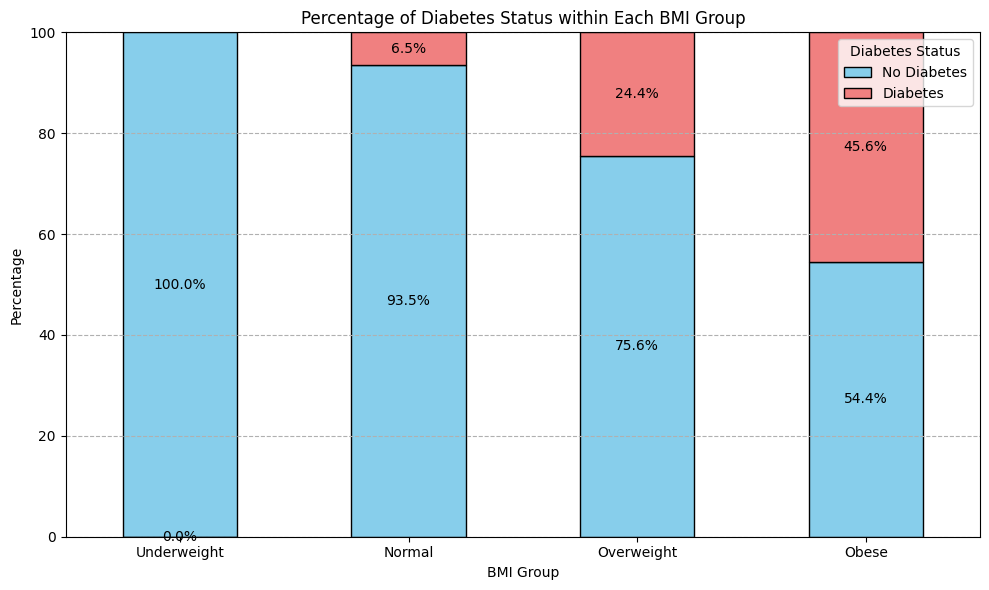

In [32]:
# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

ax = bmi_group_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Percentage of Diabetes Status within Each BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100) # Ensure y-axis is from 0 to 100
plt.legend(title='Diabetes Status')
plt.grid(axis='y', linestyle='--')

# Add labels to the bars (optional: requires iterating through patches)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')


plt.tight_layout()
plt.show()

In [33]:
# Group by 'Pregnancies' and 'Outcome', then count the occurrences
pregnancies_diabetes_group = df.groupby(['Pregnancies', 'Outcome_Group']).size().unstack(fill_value=0)
pregnancies_diabetes_group

Outcome_Group  Diabetes  No Diabetes
Pregnancies                         
0                    38           73
1                    29          106
2                    19           84
3                    27           48
4                    23           45
5                    21           36
6                    16           34
7                    25           20
8                    22           16
9                    18           10
10                   10           14
11                    7            4
12                    4            5
13                    5            5
14                    2            0
15                    1            0
17                    1            0

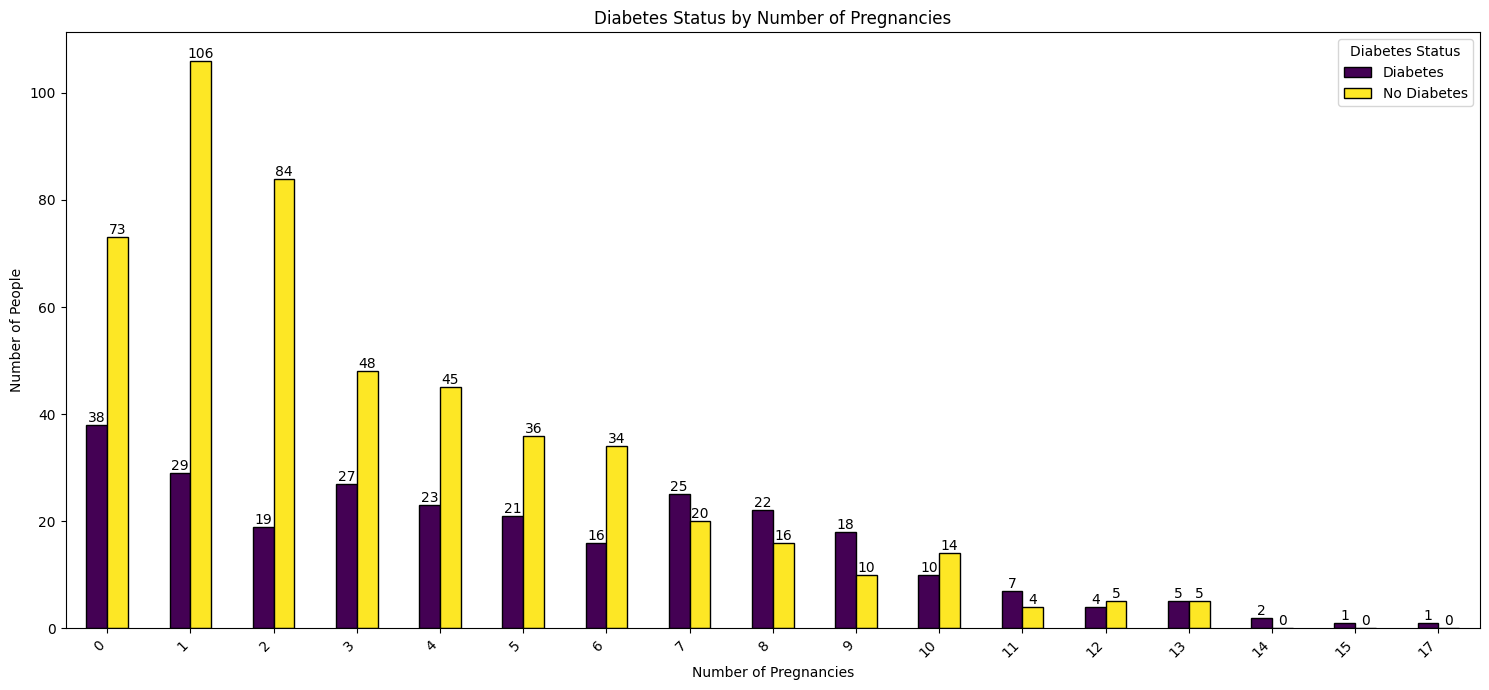

In [34]:
# Plotting the grouped data

ax = pregnancies_diabetes_group.plot(kind='bar', figsize=(15, 7), colormap='viridis', edgecolor='black')
plt.title('Diabetes Status by Number of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diabetes Status')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.show()

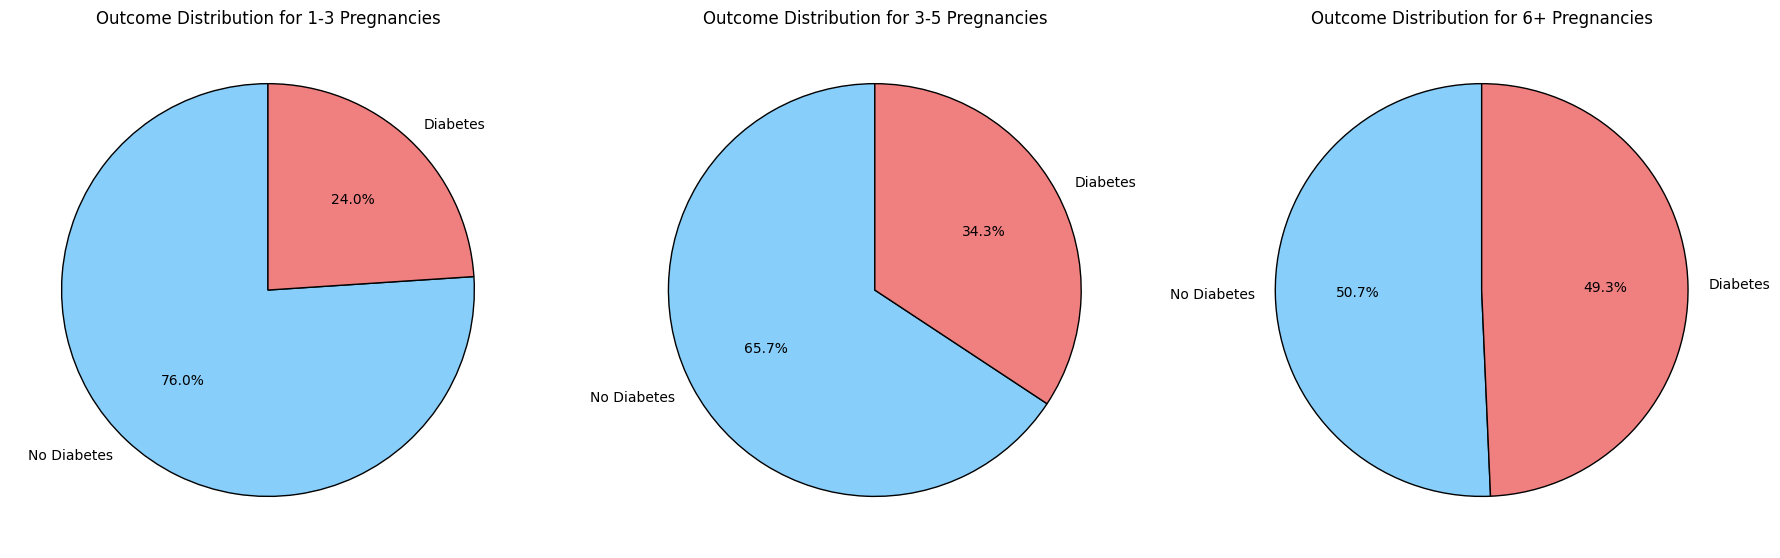

In [35]:
# Define pregnancy ranges
pregnancy_range_1_3 = df[(df['Pregnancies'] >= 1) & (df['Pregnancies'] <= 3)]
pregnancy_range_4_6 = df[(df['Pregnancies'] >= 4) & (df['Pregnancies'] <= 6)]
pregnancy_range_6_plus = df[df['Pregnancies'] >= 6]

# Count outcomes in each range
outcome_counts_1_3 = pregnancy_range_1_3['Outcome'].value_counts()
outcome_counts_4_6= pregnancy_range_4_6['Outcome'].value_counts()
outcome_counts_6_plus = pregnancy_range_6_plus['Outcome'].value_counts()

# Create a grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first pie chart (1-3 pregnancies)
axes[0].pie(outcome_counts_1_3, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightcoral'], wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Outcome Distribution for 1-3 Pregnancies')

# Plot the second pie chart (3-5 pregnancies)
axes[1].pie(outcome_counts_4_6, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightcoral'], wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Outcome Distribution for 3-5 Pregnancies')

# Plot the third pie chart (6+ pregnancies)
axes[2].pie(outcome_counts_6_plus, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightcoral'], wedgeprops={'edgecolor': 'black'})
axes[2].set_title('Outcome Distribution for 6+ Pregnancies')

# Adjust layout
plt.tight_layout()
plt.show()

In [36]:
# Define bins for DiabetesPedigreeFunction
bins = [0, 0.5, 1.0, 1.5, df['DiabetesPedigreeFunction'].max()]
labels = ['0-0.5', '0.5-1.0', '1.0-1.5', '>1.5']

# Create a new column for the bins
df['Pedigree_Bin'] = pd.cut(df['DiabetesPedigreeFunction'], bins=bins, labels=labels, right=False)

# Group by 'Pedigree_Bin' and 'Outcome_Group', then count the occurrences
pedigree_diabetes_group = df.groupby(['Pedigree_Bin', 'Outcome_Group']).size().unstack(fill_value=0)
pedigree_diabetes_group

Outcome_Group  Diabetes  No Diabetes
Pedigree_Bin                        
0-0.5               142          349
0.5-1.0              97          129
1.0-1.5              25           16
>1.5                  3            6

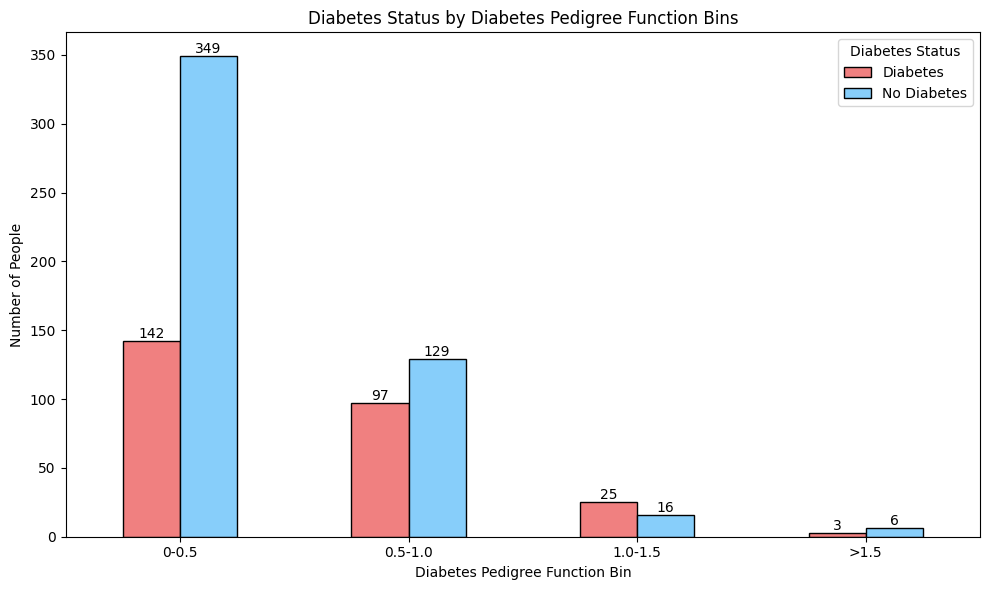

In [37]:
# Plotting the grouped data
ax = pedigree_diabetes_group.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightskyblue'], edgecolor='black')
plt.title('Diabetes Status by Diabetes Pedigree Function Bins')
plt.xlabel('Diabetes Pedigree Function Bin')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Diabetes Status')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.show()

In [38]:
# Group by 'BloodPressure_Group' and 'Outcome_Group', then count the occurrences
blood_pressure_diabetes_group = df.groupby(['BloodPressure_Group', 'Outcome_Group']).size().unstack(fill_value=0)
blood_pressure_diabetes_group


Outcome_Group         Diabetes  No Diabetes
BloodPressure_Group                        
Low                         23          100
Normal                     168          312
Pre-hypertension            59           68
Stage 1 Hypertension        18           19
Stage 2 Hypertension         0            1

In [39]:
# Calculate the percentage of positive outcomes within each age group
BloodPressure_group_percentage = df.groupby('BloodPressure_Group')['Outcome'].value_counts(normalize=True).unstack() * 100 # Returns the proportions of each outcome within each group, instead of raw counts and unstacks the columns
BloodPressure_group_percentage = BloodPressure_group_percentage.rename(columns={0: 'No Diabetes', 1: 'Diabetes'})
BloodPressure_group_percentage

Outcome               No Diabetes   Diabetes
BloodPressure_Group                         
Low                     81.300813  18.699187
Normal                  65.000000  35.000000
Pre-hypertension        53.543307  46.456693
Stage 1 Hypertension    51.351351  48.648649
Stage 2 Hypertension   100.000000   0.000000

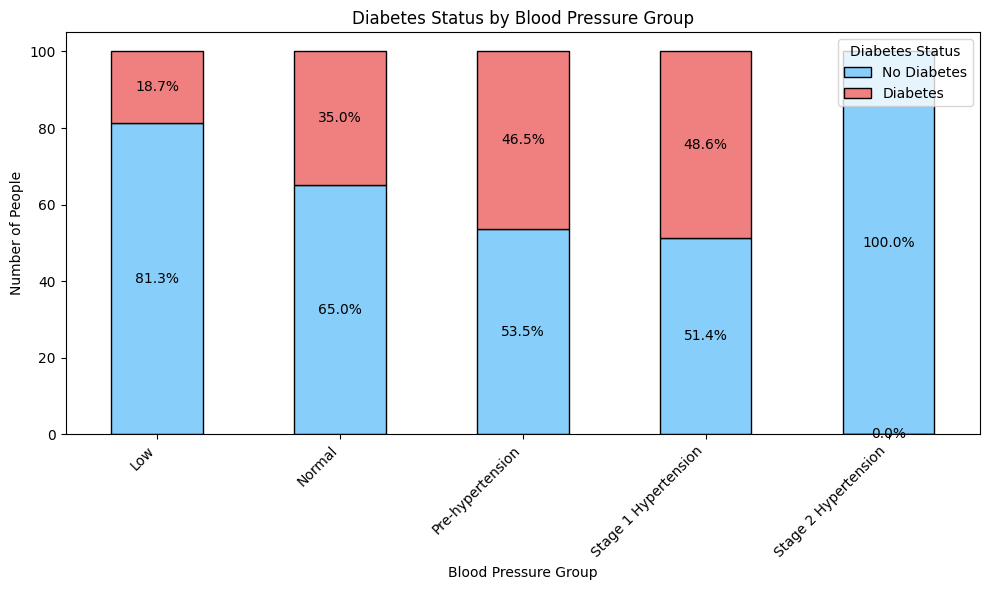

In [40]:
# Plotting the grouped data
ax = BloodPressure_group_percentage.plot(
    kind='bar',
    figsize=(10, 6),
    color=['lightskyblue', 'lightcoral'],
    stacked=True,
    edgecolor='black'
)

plt.title('Diabetes Status by Blood Pressure Group')
plt.xlabel('Blood Pressure Group')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diabetes Status')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.show()

In [41]:
# Define Insulin categories based on the provided ranges
df['Insulin_Category'] = pd.cut(df['Insulin'],
                                bins=[0, 30, 100, 150, 1000], # Increased upper bound to include high values
                                labels=['< 30 (Possible Deficiency)', '30-100 (Normal)', '100-150 (Early Resistance)', '> 150 (Significant Resistance)'],
                                right=False) # Use right=False to make the bins exclusive of the right edge, matching the descriptions

# Group by 'Insulin_Category' and 'Outcome_Group' and count occurrences
insulin_outcome_counts = df.groupby(['Insulin_Category', 'Outcome_Group']).size().unstack(fill_value=0)
insulin_outcome_counts

Outcome_Group                   Diabetes  No Diabetes
Insulin_Category                                     
< 30 (Possible Deficiency)             2            8
30-100 (Normal)                       16          118
100-150 (Early Resistance)           169          300
> 150 (Significant Resistance)        81           74

In [42]:
insulin_group_outcome_percentage = df.groupby('Insulin_Category')['Outcome'].value_counts(normalize=True).unstack() * 100 # Returns the proportions of each outcome within each group, instead of raw counts and unstacks the columns
insulin_group_outcome_percentage = insulin_group_outcome_percentage.rename(columns={0: 'No Diabetes', 1: 'Diabetes'})
insulin_group_outcome_percentage

Outcome                         No Diabetes   Diabetes
Insulin_Category                                      
< 30 (Possible Deficiency)        80.000000  20.000000
30-100 (Normal)                   88.059701  11.940299
100-150 (Early Resistance)        63.965885  36.034115
> 150 (Significant Resistance)    47.741935  52.258065

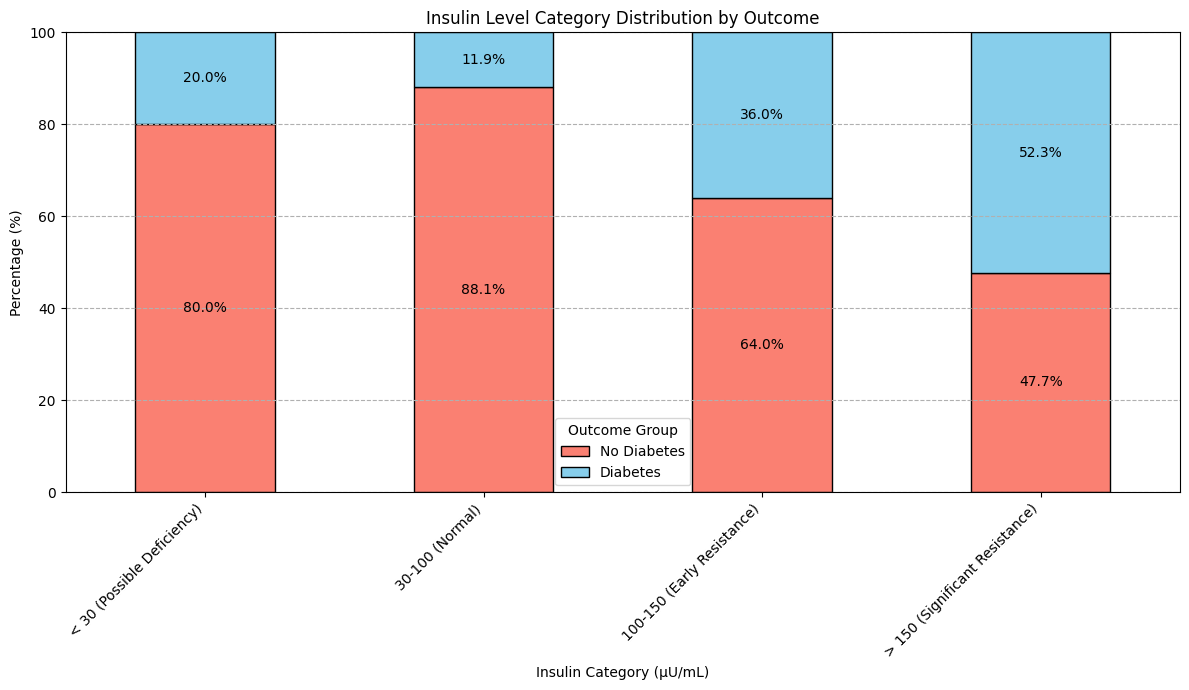

In [43]:
# Plotting the stacked bar chart
ax = insulin_group_outcome_percentage.plot(kind='bar', stacked=True, figsize=(12, 7), color=['salmon', 'skyblue'], edgecolor='black')

plt.title('Insulin Level Category Distribution by Outcome')
plt.xlabel('Insulin Category (μU/mL)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome Group')
plt.ylim(0, 100) # Ensure y-axis is from 0 to 100
plt.grid(axis='y', linestyle='--')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.tight_layout()
plt.show()

In [44]:

# Combine Glucose and Insulin Categories for the specific group
df['Glucose_Insulin_Category'] = 'Other' # Default category

# Define the conditions for the specific groups
condition_early_resistance = (df['Glucose_Category'] == 'Impaired glucose tolerance') & (df['Insulin_Category'] == '100-150 (Early Resistance)')
condition_significant_resistance = (df['Glucose_Category'] == 'Impaired glucose tolerance') & (df['Insulin_Category'] == '> 150 (Significant Resistance)')

# Apply the conditions to create the new combined category
df.loc[condition_early_resistance, 'Glucose_Insulin_Category'] = 'Elevated Glucose & Early Insulin Resistance'
df.loc[condition_significant_resistance, 'Glucose_Insulin_Category'] = 'Elevated Glucose & Significant Insulin Resistance'

# Filter the dataframe to only include the defined combined categories
filtered_glucose_insulin_df = df[df['Glucose_Insulin_Category'].isin(['Elevated Glucose & Early Insulin Resistance', 'Elevated Glucose & Significant Insulin Resistance'])]
filtered_glucose_insulin_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0       35.00000    125.0  33.6   
2              8    183.0           64.0       29.15342    125.0  23.3   
8              2    197.0           70.0       45.00000    543.0  30.5   
11            10    168.0           74.0       29.15342    125.0  38.0   
13             1    189.0           60.0       23.00000    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
749            6    162.0           62.0       29.15342    125.0  24.3   
753            0    181.0           88.0       44.00000    510.0  43.3   
754            8    154.0           78.0       32.00000    125.0  32.4   
759            6    190.0           92.0       29.15342    125.0  35.5   
761            9    170.0           74.0       31.00000    125.0  44.0   

     DiabetesPedigreeFunction  Age  Outcome          AgeGroup BMI_Group  \
0                       0.627   50        1   Late Middle Age     Obese   
2                       0.672   32        1  Early Middle Age    Normal   
8                       0.158   53        1     Early  Senior     Obese   
11                      0.537   34        1  Early Middle Age     Obese   
13                      0.398   59        1     Early  Senior     Obese   
..                        ...  ...      ...               ...       ...   
749                     0.178   50        1   Late Middle Age    Normal   
753                     0.222   26        1       Young Adult     Obese   
754                     0.443   45        1   Late Middle Age     Obese   
759                     0.278   66        1            Senior     Obese   
761                     0.403   43        1   Late Middle Age     Obese   

      BloodPressure_Group Outcome_Group            Glucose_Category  \
0                  Normal      Diabetes  Impaired glucose tolerance   
2                  Normal      Diabetes  Impaired glucose tolerance   
8                  Normal      Diabetes  Impaired glucose tolerance   
11                 Normal      Diabetes  Impaired glucose tolerance   
13                    Low      Diabetes  Impaired glucose tolerance   
..                    ...           ...                         ...   
749                Normal      Diabetes  Impaired glucose tolerance   
753      Pre-hypertension      Diabetes  Impaired glucose tolerance   
754                Normal      Diabetes  Impaired glucose tolerance   
759  Stage 1 Hypertension      Diabetes  Impaired glucose tolerance   
761                Normal      Diabetes  Impaired glucose tolerance   

    Pedigree_Bin                Insulin_Category  \
0        0.5-1.0      100-150 (Early Resistance)   
2        0.5-1.0      100-150 (Early Resistance)   
8          0-0.5  > 150 (Significant Resistance)   
11       0.5-1.0      100-150 (Early Resistance)   
13         0-0.5  > 150 (Significant Resistance)   
..           ...                             ...   
749        0-0.5      100-150 (Early Resistance)   
753        0-0.5  > 150 (Significant Resistance)   
754        0-0.5      100-150 (Early Resistance)   
759        0-0.5      100-150 (Early Resistance)   
761        0-0.5      100-150 (Early Resistance)   

                              Glucose_Insulin_Category  
0          Elevated Glucose & Early Insulin Resistance  
2          Elevated Glucose & Early Insulin Resistance  
8    Elevated Glucose & Significant Insulin Resistance  
11         Elevated Glucose & Early Insulin Resistance  
13   Elevated Glucose & Significant Insulin Resistance  
..                                                 ...  
749        Elevated Glucose & Early Insulin Resistance  
753  Elevated Glucose & Significant Insulin Resistance  
754        Elevated Glucose & Early Insulin Resistance  
759        Elevated Glucose & Early Insulin Resistance  
761        Elevated Glucose & Early Insulin Resistance  

[184 rows x 17 columns]

In [45]:
filtered_glucose_insulin_df.groupby('Glucose_Insulin_Category')['Outcome'].value_counts()

Glucose_Insulin_Category                           Outcome
Elevated Glucose & Early Insulin Resistance        1          77
                                                   0          35
Elevated Glucose & Significant Insulin Resistance  1          51
                                                   0          21
Name: count, dtype: int64

In [46]:
# Group by the new combined category and Outcome, then calculate percentages
glucose_insulin_outcome_percentage = filtered_glucose_insulin_df.groupby('Glucose_Insulin_Category')['Outcome'].value_counts(normalize=True).unstack() * 100
glucose_insulin_outcome_percentage = glucose_insulin_outcome_percentage.rename(columns={0: 'No Diabetes', 1: 'Diabetes'})
glucose_insulin_outcome_percentage

Outcome                                            No Diabetes   Diabetes
Glucose_Insulin_Category                                                 
Elevated Glucose & Early Insulin Resistance          31.250000  68.750000
Elevated Glucose & Significant Insulin Resistance    29.166667  70.833333

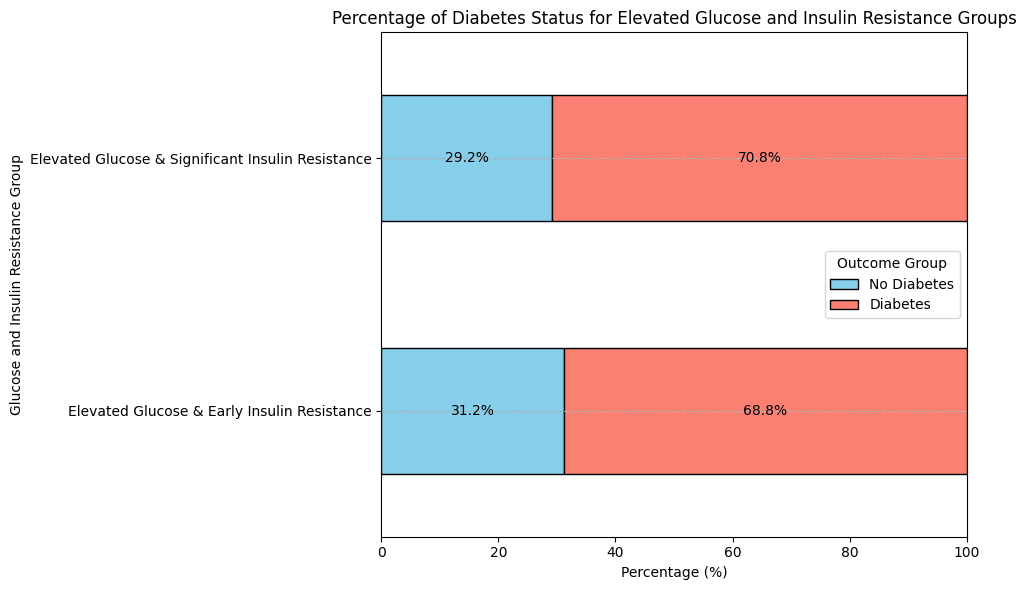

In [47]:
# Plotting the stacked bar chart
ax = glucose_insulin_outcome_percentage.plot(kind='barh', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')

plt.title('Percentage of Diabetes Status for Elevated Glucose and Insulin Resistance Groups')
plt.ylabel('Glucose and Insulin Resistance Group')
plt.xlabel('Percentage (%)')
plt.legend(title='Outcome Group')
plt.xlim(0, 100) # Ensure y-axis is from 0 to 100
plt.grid(axis='y', linestyle='--')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.tight_layout()
plt.show()

In [48]:
# Group by 'BMI_Group' and count the occurrences
bmi_group_counts = df['BMI_Group'].value_counts()

# Group by 'BMI_Group' and 'Outcome_Group', then count the occurrences
bmi_diabetes_group = df.groupby(['BMI_Group', 'Outcome_Group']).size().unstack(fill_value=0)
bmi_diabetes_group

Outcome_Group  Diabetes  No Diabetes
BMI_Group                           
Underweight           0            4
Normal                7          101
Overweight           44          136
Obese               217          259

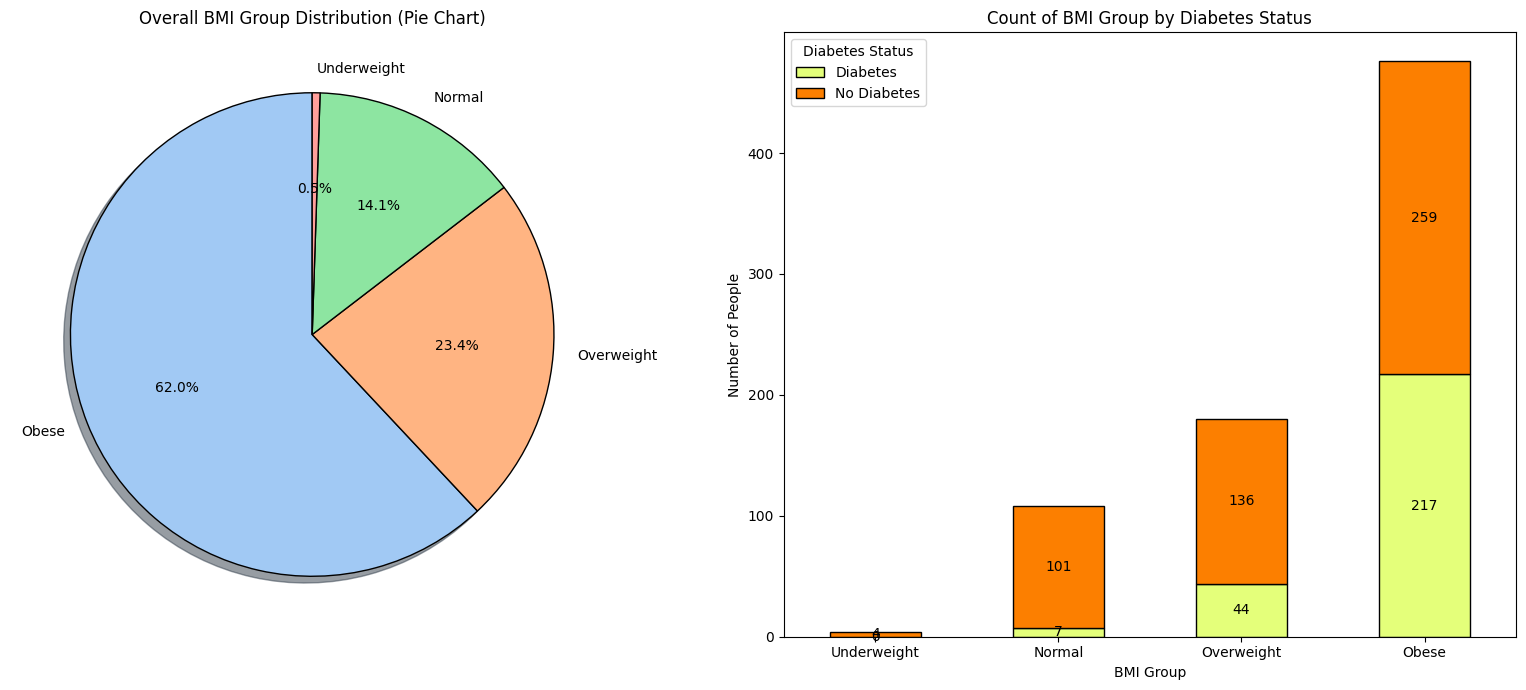

In [49]:
# Create the figure and a grid of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# First plot (left): Pie chart for overall BMI Group distribution
axes[0].pie(bmi_group_counts, labels=bmi_group_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel')[0:4], shadow=True, wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Overall BMI Group Distribution (Pie Chart)')
axes[0].set_ylabel('') # Hide the y-label

# Second plot (right): Stacked bar chart for count of BMI group by diabetes status
bmi_diabetes_group.plot(kind='bar', ax=axes[1], colormap='Wistia', stacked=True, edgecolor='black')
axes[1].set_title('Count of BMI Group by Diabetes Status')
axes[1].set_xlabel('BMI Group')
axes[1].set_ylabel('Number of People')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Diabetes Status')

# Add count labels to the stacked bars
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='center')

# Adjust layout
plt.tight_layout()
plt.show()

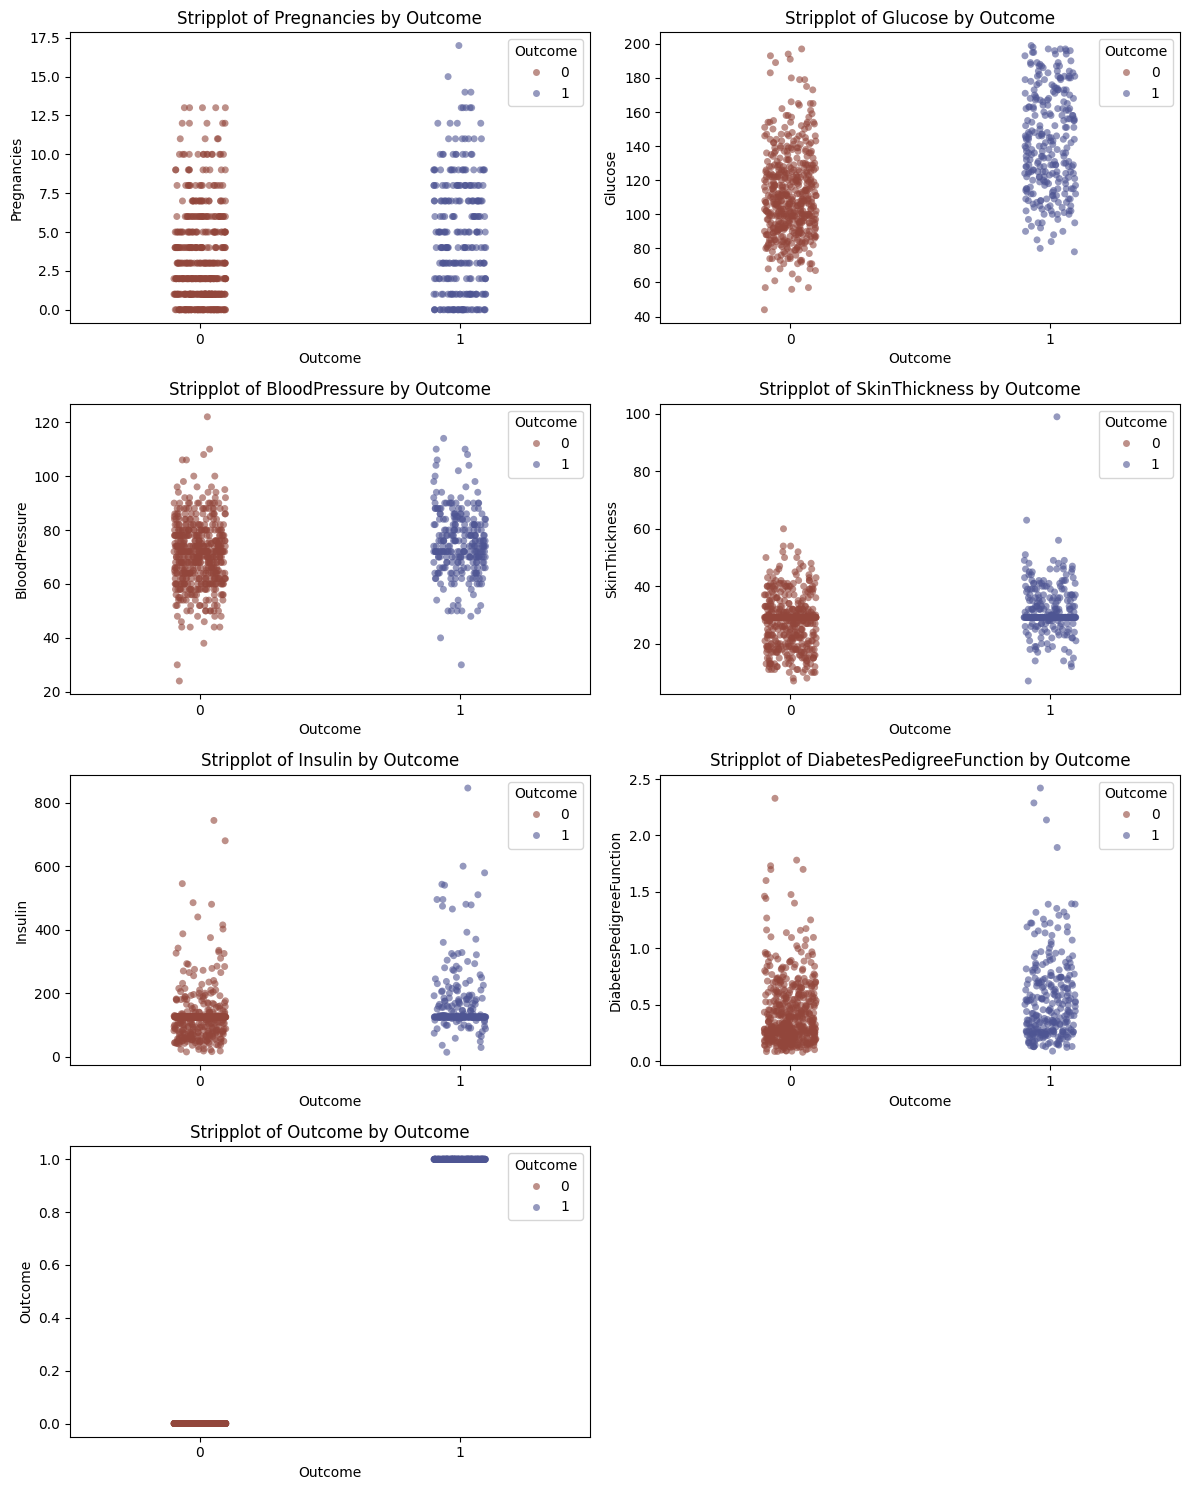

In [50]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
axes = axes.flatten()

# Iterate through each numerical column (excluding 'Outcome')
for i, col in enumerate(numerical_cols):
    sns.stripplot(x='Outcome', y=col, data=df, ax=axes[i], palette='managua', alpha=0.6, hue='Outcome')
    axes[i].set_title(f'Stripplot of {col} by Outcome')
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


# Adjust layout
plt.tight_layout()
plt.show()

In [51]:
# Apply the risk scoring logic based on most important features to the DataFrame
def calculate_risk_score(row):
    score = 0  # Initialize 0 and incerement by condition
    if row['BMI'] > 30:
        score += 1
    if row['Glucose'] > 140:
        score += 1
    if row['Age'] > 40:
        score += 1
    if row['Insulin'] > 150:
        score += 1
    if row['Pregnancies'] > 3:
        score += 1
    return score

df['RiskScore'] = df.apply(calculate_risk_score, axis=1)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0       35.00000    125.0  33.6   
1              1     85.0           66.0       29.00000    125.0  26.6   
2              8    183.0           64.0       29.15342    125.0  23.3   
3              1     89.0           66.0       23.00000     94.0  28.1   
4              0    137.0           40.0       35.00000    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0       48.00000    180.0  32.9   
764            2    122.0           70.0       27.00000    125.0  36.8   
765            5    121.0           72.0       23.00000    112.0  26.2   
766            1    126.0           60.0       29.15342    125.0  30.1   
767            1     93.0           70.0       31.00000    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome          AgeGroup   BMI_Group  \
0                       0.627   50        1   Late Middle Age       Obese   
1                       0.351   31        0  Early Middle Age  Overweight   
2                       0.672   32        1  Early Middle Age      Normal   
3                       0.167   21        0       Young Adult  Overweight   
4                       2.288   33        1  Early Middle Age       Obese   
..                        ...  ...      ...               ...         ...   
763                     0.171   63        0            Senior       Obese   
764                     0.340   27        0       Young Adult       Obese   
765                     0.245   30        0       Young Adult  Overweight   
766                     0.349   47        1   Late Middle Age       Obese   
767                     0.315   23        0       Young Adult       Obese   

    BloodPressure_Group Outcome_Group            Glucose_Category  \
0                Normal      Diabetes  Impaired glucose tolerance   
1                Normal   No Diabetes                      Normal   
2                Normal      Diabetes  Impaired glucose tolerance   
3                Normal   No Diabetes                      Normal   
4                   Low      Diabetes                      Normal   
..                  ...           ...                         ...   
763              Normal   No Diabetes                      Normal   
764              Normal   No Diabetes                      Normal   
765              Normal   No Diabetes                      Normal   
766                 Low      Diabetes                      Normal   
767              Normal   No Diabetes                      Normal   

    Pedigree_Bin                Insulin_Category  \
0        0.5-1.0      100-150 (Early Resistance)   
1          0-0.5      100-150 (Early Resistance)   
2        0.5-1.0      100-150 (Early Resistance)   
3          0-0.5                 30-100 (Normal)   
4           >1.5  > 150 (Significant Resistance)   
..           ...                             ...   
763        0-0.5  > 150 (Significant Resistance)   
764        0-0.5      100-150 (Early Resistance)   
765        0-0.5      100-150 (Early Resistance)   
766        0-0.5      100-150 (Early Resistance)   
767        0-0.5      100-150 (Early Resistance)   

                        Glucose_Insulin_Category  RiskScore  
0    Elevated Glucose & Early Insulin Resistance          4  
1                                          Other          0  
2    Elevated Glucose & Early Insulin Resistance          2  
3                                          Other          0  
4                                          Other          2  
..                                           ...        ...  
763                                        Other          4  
764                                        Other          1  
765                                        Other          1  
766                                        Other          2  
767                                        Other       

In [52]:
# Calculate the diabetes rate for each risk score
risk_diabetes_rate = df.groupby('RiskScore')['Outcome'].mean().reset_index()
risk_diabetes_rate

RiskScore   Outcome
0          0  0.046154
1          1  0.201794
2          2  0.417910
3          3  0.536232
4          4  0.750000
5          5  0.875000

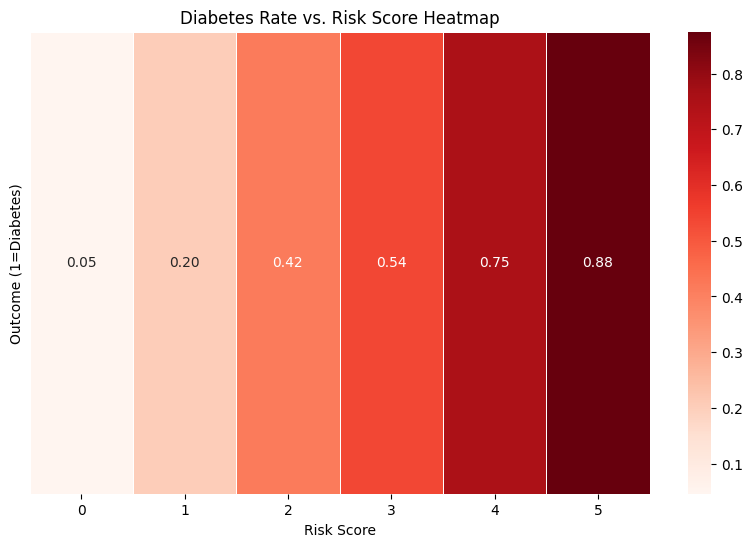

In [53]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(risk_diabetes_rate.set_index('RiskScore').T, annot=True, cmap='Reds', fmt=".2f", linewidths=.5)
plt.title('Diabetes Rate vs. Risk Score Heatmap')
plt.xlabel('Risk Score')
plt.ylabel('Outcome (1=Diabetes)')
plt.yticks([]) # Hide the y-axis label as it's just 'Outcome (1=Diabetes)'
plt.show()

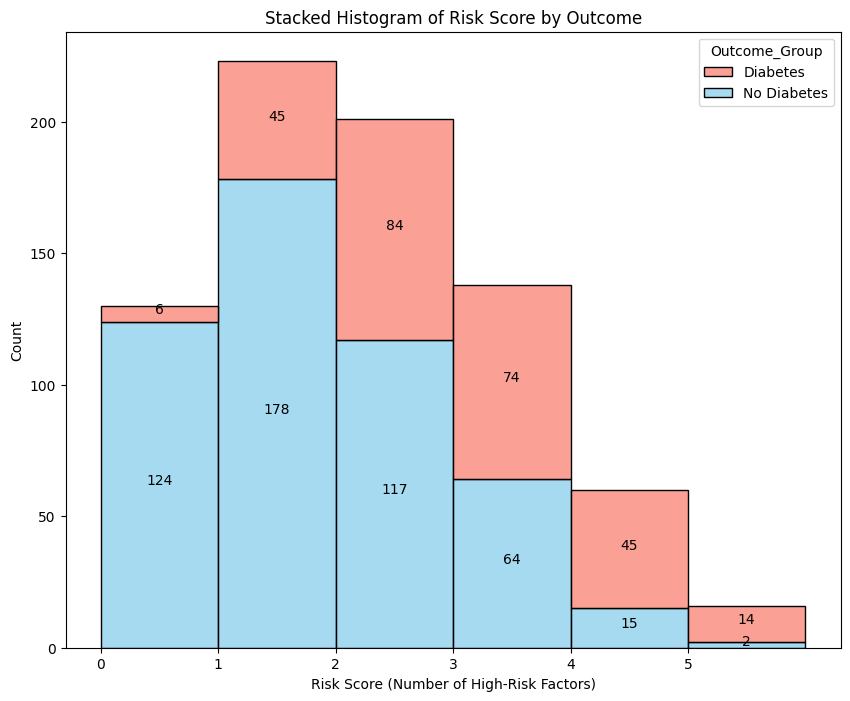

In [54]:
plt.figure(figsize=(10, 8))

colors = ['salmon', 'skyblue']
ax = sns.histplot(data=df, x='RiskScore', hue='Outcome_Group', multiple='stack', palette=colors, edgecolor='black', bins=range(0, df['RiskScore'].max() + 2)) # (0 to 6) This ensures that each unique integer RiskScore value has its own bin in the histogram.
plt.title('Stacked Histogram of Risk Score by Outcome')
plt.xlabel('Risk Score (Number of High-Risk Factors)')
plt.ylabel('Count')
plt.xticks(range(df['RiskScore'].max() + 1)) # From 0 t0 5, since max risk score is 5

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center', padding=3, fontsize=10)

plt.show()

In [55]:
X = df.drop(columns=df.select_dtypes(exclude=np.number))
X.drop(columns=['Outcome'], inplace=True)
X.drop(columns=['RiskScore'], inplace=True)
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0       35.00000    125.0  33.6   
1              1     85.0           66.0       29.00000    125.0  26.6   
2              8    183.0           64.0       29.15342    125.0  23.3   
3              1     89.0           66.0       23.00000     94.0  28.1   
4              0    137.0           40.0       35.00000    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0       48.00000    180.0  32.9   
764            2    122.0           70.0       27.00000    125.0  36.8   
765            5    121.0           72.0       23.00000    112.0  26.2   
766            1    126.0           60.0       29.15342    125.0  30.1   
767            1     93.0           70.0       31.00000    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [56]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

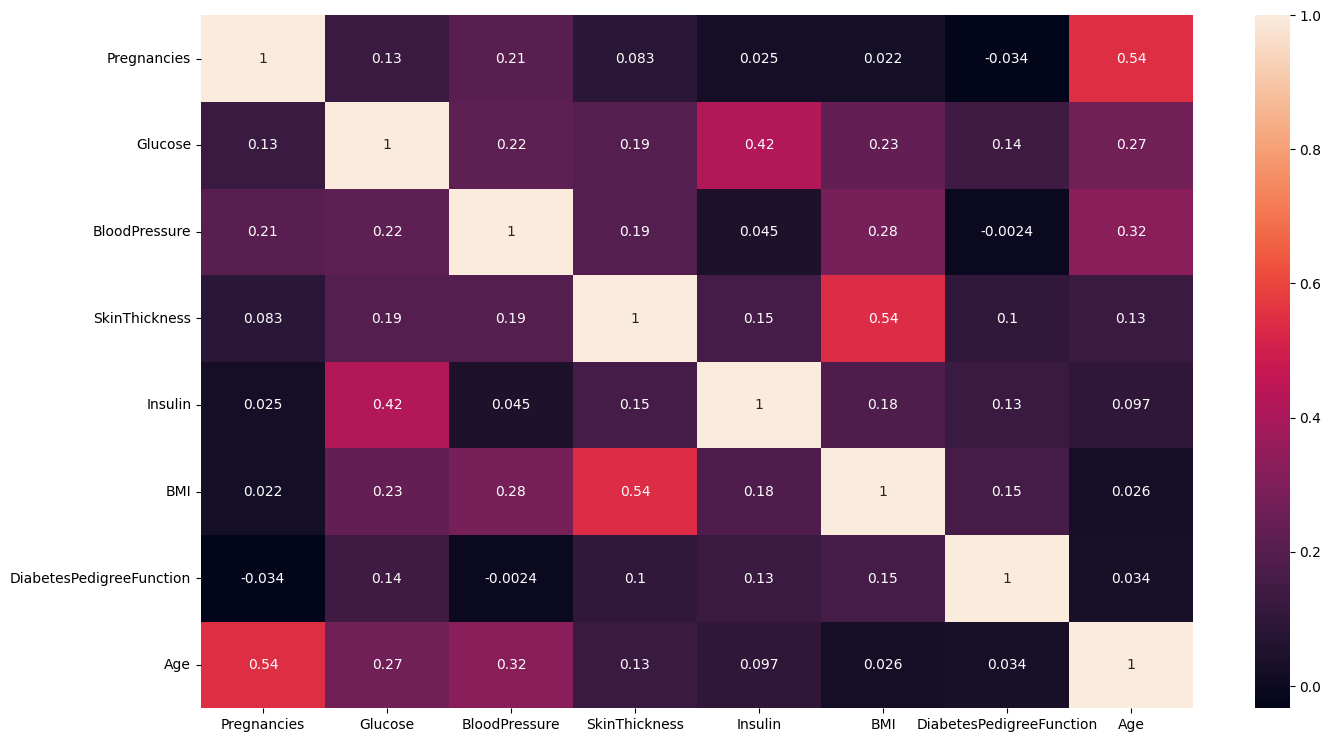

In [57]:
plt.figure(figsize=(16, 9))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [58]:
scaler = StandardScaler()

scaledX = scaler.fit_transform(X)

scaledX

array([[ 0.63994726,  0.86510807, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [59]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)

In [61]:
# Training the model to allow it make predictions based on the input
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [62]:
log_preds = log.predict(X_test)

In [63]:
# Evaluates the model
print(f"Accuracy Score for Logistic Regression: {accuracy_score(y_test, log_preds)}\n")
print(classification_report(y_test, log_preds))

Accuracy Score for Logistic Regression: 0.7532467532467533

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [64]:
cm_log_reg = confusion_matrix(y_test, log_preds)
cm_log_reg

array([[82, 17],
       [21, 34]])

In [65]:
tn, fp, fn, tp = cm_log_reg.ravel()

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 34
False Positives (FP): 17
True Negatives (TN): 82
False Negatives (FN): 21


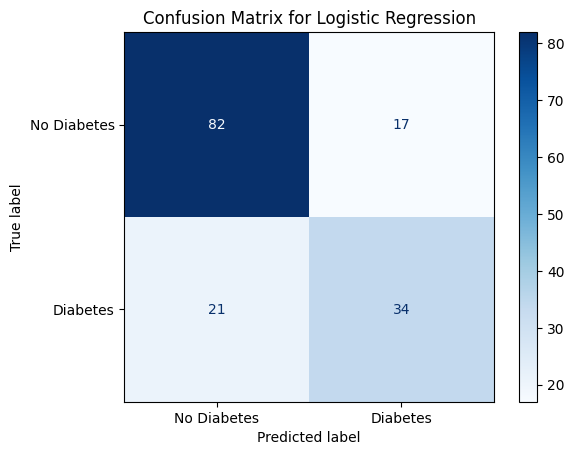

In [66]:
# Define the labels for the confusion matrix
labels = ['No Diabetes', 'Diabetes']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [67]:
log_prob = log.predict_proba(X_test)[:, 1] #probability for positive class

auc_score_log = roc_auc_score(y_test, log_prob)
print(auc_score_log)

0.82277318640955


In [68]:
forest = RandomForestClassifier(random_state=56)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=56)

In [69]:
forest_preds = forest.predict(X_test)
print(f"Accuracy Score for Random Forest Classifier: {accuracy_score(y_test, forest_preds)}\n")
print(classification_report(y_test, forest_preds))

Accuracy Score for Random Forest Classifier: 0.7662337662337663

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [70]:
cm_forest = confusion_matrix(y_test, forest_preds)
cm_forest

array([[81, 18],
       [18, 37]])

In [71]:
tn, fp, fn, tp = cm_forest.ravel()

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 37
False Positives (FP): 18
True Negatives (TN): 81
False Negatives (FN): 18


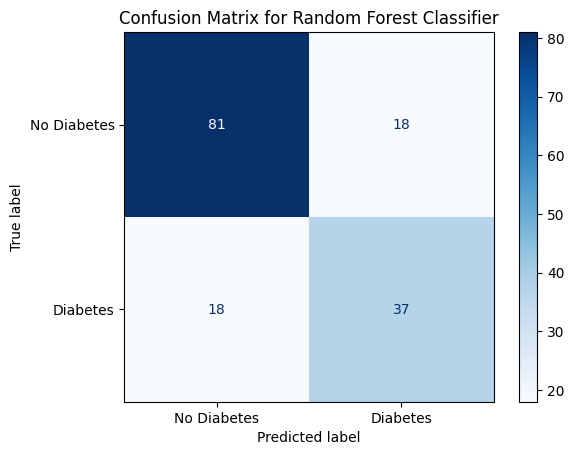

In [72]:
# Define the labels for the confusion matrix
labels = ['No Diabetes', 'Diabetes']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [73]:
forest_prob = forest.predict_proba(X_test)[:, 1] #probability for positive class

auc_score_forest = roc_auc_score(y_test, forest_prob) #Displays how well model can distingusih between positive and negative classes
print(auc_score_forest)

0.8120293847566574


In [74]:
#Initialize the decison tree classifier
tree = DecisionTreeClassifier(random_state=56)

# Fit the model to the training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=56)

In [75]:
# Make predictions on the test data
tree_preds = tree.predict(X_test)


# Evaluate the model
print(f"Accuracy Score for Decision Tree Classifier: {accuracy_score(y_test, tree_preds)}\n")
print(classification_report(y_test, tree_preds))

Accuracy Score for Decision Tree Classifier: 0.6948051948051948

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        99
           1       0.57      0.60      0.58        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154



In [76]:
# Confusion Matrix
cm_tree = confusion_matrix(y_test, tree_preds)
print("Confusion Matrix:")
print(cm_tree)

# Extracting TP, FP, TN, FN
tn, fp, fn, tp = cm_tree.ravel()
print(f"\nTrue Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


Confusion Matrix:
[[74 25]
 [22 33]]

True Positives (TP): 33
False Positives (FP): 25
True Negatives (TN): 74
False Negatives (FN): 22


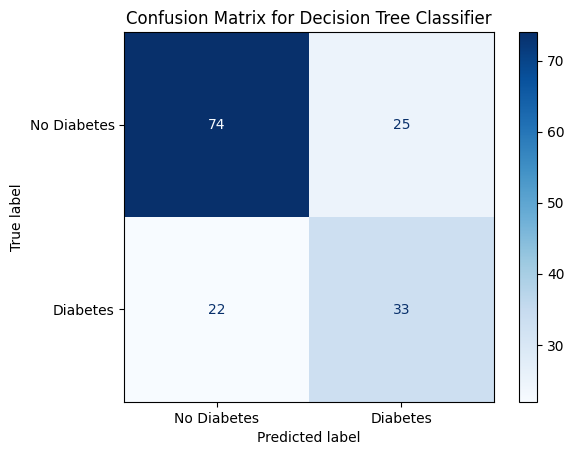

In [77]:
# Plot the confusion matrix
labels = ['No Diabetes', 'Diabetes']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [78]:
# ROC AUC Score
tree_prob = tree.predict_proba(X_test)[:, 1]
auc_score_tree = roc_auc_score(y_test, tree_prob)
print(f"\nROC AUC Score for Decision Tree Classifier: {auc_score_tree}")


ROC AUC Score for Decision Tree Classifier: 0.6737373737373737


In [79]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 56,
 'splitter': 'best'}

In [80]:
# Define the parameter grid for Decision Tree
param_grid_tree = {'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

In [81]:
# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
# scoring='accuracy' or 'roc_auc' depending on the evaluation metric you prefer
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid_tree, cv=5, scoring='accuracy')

In [82]:
# Fit GridSearchCV to the training data
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=56),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [83]:
# Get the best parameters and the best score
best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_

In [84]:
print(f"\nBest parameters found by Grid Search for Decision Tree: {best_params_tree}")
print(f"Best cross-validation accuracy score for Decision Tree: {best_score_tree:.4f}")


Best parameters found by Grid Search for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation accuracy score for Decision Tree: 0.7541


In [85]:
# Use the best estimator to make predictions on the test set
best_tree_model = grid_search_tree.best_estimator_
best_tree_preds = best_tree_model.predict(X_test)

In [86]:
# Evaluate the best model on the test set
print(f"\nAccuracy Score for Tuned Decision Tree Classifier on Test Set: {accuracy_score(y_test, best_tree_preds)}\n")
print("Classification Report for Tuned Decision Tree Classifier:")
print(classification_report(y_test, best_tree_preds))


Accuracy Score for Tuned Decision Tree Classifier on Test Set: 0.7207792207792207

Classification Report for Tuned Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



In [87]:
# Confusion Matrix for the best model
cm_best_tuned_tree = confusion_matrix(y_test, best_tree_preds)
print("\nConfusion Matrix for Tuned Decision Tree Classifier:")
print(cm_best_tuned_tree)


Confusion Matrix for Tuned Decision Tree Classifier:
[[69 30]
 [13 42]]


In [88]:
# Extracting TP, FP, TN, FN for the best model
tn, fp, fn, tp = cm_best_tuned_tree.ravel()
print(f"\nTrue Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 42
False Positives (FP): 30
True Negatives (TN): 69
False Negatives (FN): 13


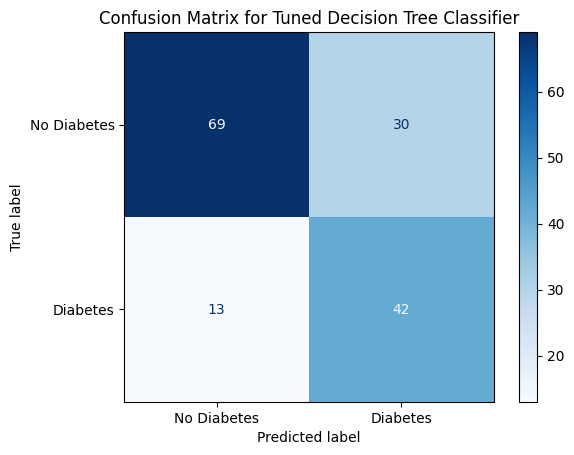

In [89]:
# Plot the confusion matrix for the best model
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_tuned_tree, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Decision Tree Classifier')
plt.show()

In [90]:
# ROC AUC Score for the best model
best_tree_prob = best_tree_model.predict_proba(X_test)[:, 1]
auc_score_best_tree = roc_auc_score(y_test, best_tree_prob)
print(f"\nROC AUC Score for Tuned Decision Tree Classifier on Test Set: {auc_score_best_tree:.4f}")




ROC AUC Score for Tuned Decision Tree Classifier on Test Set: 0.8023


In [91]:
# Hypertuning Parameters for Random Forest Classifier
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 56,
 'verbose': 0,
 'warm_start': False}

In [92]:
# Defining the parameter grid for Random Forest
param_grid_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [93]:
# Initializing GridSearchCV
# cv=5 means 5-fold cross-validation - reducing overfitting
# scoring='accuracy' or 'roc_auc' depending on the evaluation metric preferred
grid_search_forest = GridSearchCV(estimator=forest, param_grid=param_grid_forest, cv=5, scoring='accuracy', n_jobs=-1)

In [94]:
# Fit GridSearchCV to the training data
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=56), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [95]:
# Get the best parameters and the best score
best_params_forest = grid_search_forest.best_params_
best_score_forest = grid_search_forest.best_score_

In [96]:
print(f"\nBest parameters found by Grid Search for Random Forest: {best_params_forest}")
print(f"Best cross-validation accuracy score for Random Forest: {best_score_forest:.4f}")


Best parameters found by Grid Search for Random Forest: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy score for Random Forest: 0.7786


In [97]:
# Use the best estimator to make predictions on the test set
best_forest_model = grid_search_forest.best_estimator_
best_forest_preds = best_forest_model.predict(X_test)

In [98]:
# Evaluate the best model on the test set
print(f"\nAccuracy Score for Tuned Random Forest Classifier on Test Set: {accuracy_score(y_test, best_forest_preds)}\n")
print("Classification Report for Tuned Random Forest Classifier:")
print(classification_report(y_test, best_forest_preds))


Accuracy Score for Tuned Random Forest Classifier on Test Set: 0.7597402597402597

Classification Report for Tuned Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [99]:
# Confusion Matrix for the best model
cm_best_tuned_forest = confusion_matrix(y_test, best_forest_preds)
print("\nConfusion Matrix for Tuned Random Forest Classifier:")
print(cm_best_tuned_forest)


Confusion Matrix for Tuned Random Forest Classifier:
[[79 20]
 [17 38]]


In [100]:
# Extracting TP, FP, TN, FN for the best model
tn, fp, fn, tp = cm_best_tuned_forest.ravel()
print(f"\nTrue Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 38
False Positives (FP): 20
True Negatives (TN): 79
False Negatives (FN): 17


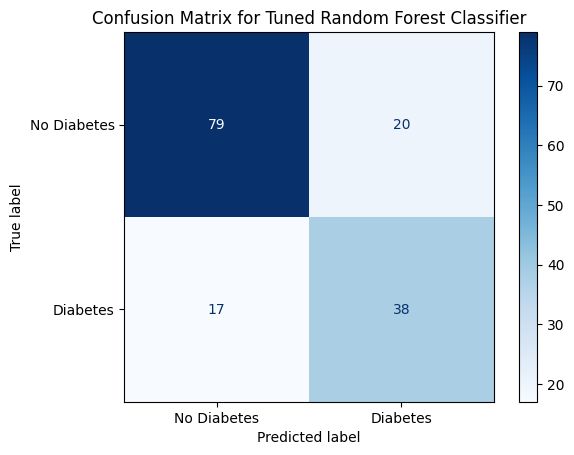

In [101]:
# Plot the confusion matrix for the best model
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_tuned_forest, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Random Forest Classifier')
plt.show()

In [102]:
# ROC AUC Score for the best model
best_forest_prob = best_forest_model.predict_proba(X_test)[:, 1]
auc_score_best_forest = roc_auc_score(y_test, best_forest_prob)
print(f"\nROC AUC Score for Tuned Random Forest Classifier on Test Set: {auc_score_best_forest:.4f}")


ROC AUC Score for Tuned Random Forest Classifier on Test Set: 0.8232


In [103]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

In [104]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [105]:
# Make predictions
xgb_preds = xgb_model.predict(X_test)

In [106]:
# Evaluate the XGBoost model
print(f"Accuracy Score for XGBoost Classifier: {accuracy_score(y_test, xgb_preds)}\n")
print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, xgb_preds))

Accuracy Score for XGBoost Classifier: 0.7402597402597403

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [107]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_preds)
print("\nConfusion Matrix for XGBoost Classifier:")
print(cm_xgb)


Confusion Matrix for XGBoost Classifier:
[[76 23]
 [17 38]]


In [108]:
# Extracting TP, FP, TN, FN
tn, fp, fn, tp = cm_xgb.ravel()
print(f"\nTrue Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 38
False Positives (FP): 23
True Negatives (TN): 76
False Negatives (FN): 17


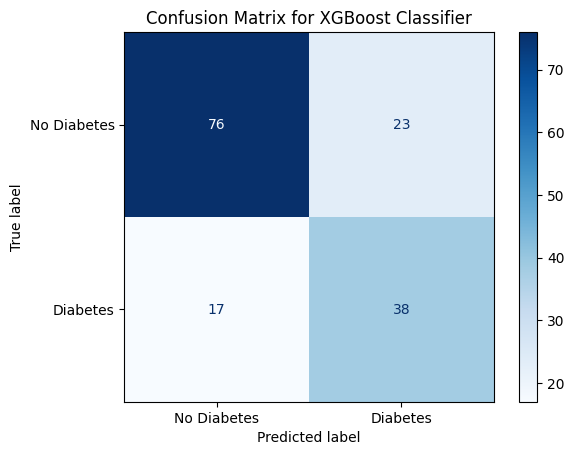

In [109]:
# Plot the confusion matrix
labels = ['No Diabetes', 'Diabetes']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

In [110]:
# ROC AUC Score
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, xgb_prob)
print(f"\nROC AUC Score for XGBoost Classifier: {auc_score_xgb:.4f}")


ROC AUC Score for XGBoost Classifier: 0.7710


In [111]:
# Initialize the Random Forest Classifier
# Use class_weight='balanced' to give more importance to the minority class (Outcome = 1)
forest_rs = RandomForestClassifier(random_state=56, class_weight='balanced')

In [112]:
# Define the parameter distribution for RandomizedSearchCV
param_dist_forest = {
    'n_estimators': randint(100, 500),  # Number of trees in the forest
    'max_depth': randint(5, 50),       # Maximum depth of the trees
    'min_samples_split': randint(2, 20), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],    # Function to measure the quality of a split
    'bootstrap': [True, False]           # Whether bootstrap samples are used when building trees
}

In [113]:
# Initialize RandomizedSearchCV
# cv=5 means 5-fold cross-validation
# n_iter=100 specifies the number of parameter settings that are sampled. Higher n_iter means more computation but better chance of finding a good solution.
# scoring='f1' is a good metric for imbalanced datasets, focusing on the harmonic mean of precision and recall for the positive class.
# n_jobs=-1 uses all available processors.
random_search_forest = RandomizedSearchCV(
    estimator=forest_rs,
    param_distributions=param_dist_forest,
    n_iter=100, # Number of parameter settings to sample
    cv=5,
    scoring='f1', # Focus on F1-score for class 1
    random_state=42,
    n_jobs=-1
)

In [114]:
# Fit RandomizedSearchCV to the training data
random_search_forest.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=56),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79426783aed0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7942678391d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79426783a350>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794267855450>},
                   random_state=42, scoring='f1')

In [115]:
# Get the best parameters and the best score
best_params_rs_forest = random_search_forest.best_params_
best_score_rs_forest = random_search_forest.best_score_

In [116]:
print(f"\nBest parameters found by Randomized Search for Random Forest: {best_params_rs_forest}")
print(f"Best cross-validation F1 score for Random Forest: {best_score_rs_forest:.4f}")


Best parameters found by Randomized Search for Random Forest: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 199}
Best cross-validation F1 score for Random Forest: 0.7016


In [117]:
# Use the best estimator to make predictions on the test set
best_rs_forest_model = random_search_forest.best_estimator_
best_rs_forest_preds = best_rs_forest_model.predict(X_test)

In [118]:
# Evaluate the best model on the test set
print(f"\nAccuracy Score for Tuned Random Forest Classifier (Randomized Search) on Test Set: {accuracy_score(y_test, best_rs_forest_preds)}\n")
print("Classification Report for Tuned Random Forest Classifier (Randomized Search):")
print(classification_report(y_test, best_rs_forest_preds))


Accuracy Score for Tuned Random Forest Classifier (Randomized Search) on Test Set: 0.7467532467532467

Classification Report for Tuned Random Forest Classifier (Randomized Search):
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        99
           1       0.61      0.78      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.75       154



In [119]:
# Confusion Matrix for the best model
cm_best_rs_tuned_forest = confusion_matrix(y_test, best_rs_forest_preds)
print("\nConfusion Matrix for Tuned Random Forest Classifier (Randomized Search):")
print(cm_best_rs_tuned_forest)


Confusion Matrix for Tuned Random Forest Classifier (Randomized Search):
[[72 27]
 [12 43]]


In [120]:
# Extracting TP, FP, TN, FN for the best model
tn, fp, fn, tp = cm_best_rs_tuned_forest.ravel()
print(f"\nTrue Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 43
False Positives (FP): 27
True Negatives (TN): 72
False Negatives (FN): 12


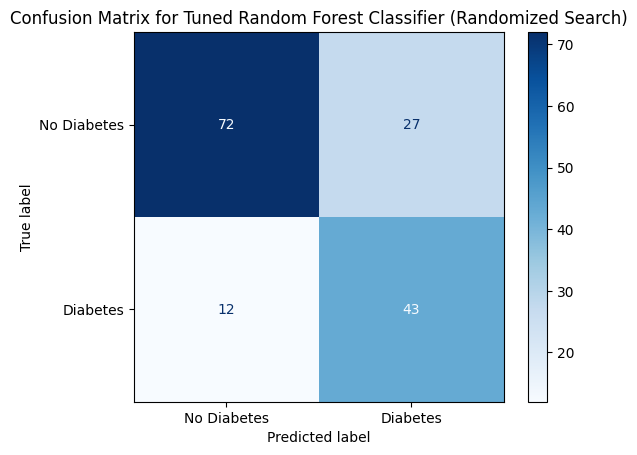

In [121]:
# Plot the confusion matrix for the best model
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_rs_tuned_forest, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Random Forest Classifier (Randomized Search)')
plt.show()

In [122]:
# ROC AUC Score for the best model
best_rs_forest_prob = best_rs_forest_model.predict_proba(X_test)[:, 1]
auc_score_best_rs_forest = roc_auc_score(y_test, best_rs_forest_prob)
print(f"\nROC AUC Score for Tuned Random Forest Classifier (Randomized Search) on Test Set: {auc_score_best_rs_forest:.4f}")


ROC AUC Score for Tuned Random Forest Classifier (Randomized Search) on Test Set: 0.8320


In [123]:


# Get feature importances for each model
feature_importances_logreg = log.coef_[0]
feature_importances_forest = forest.feature_importances_
feature_importances_tuned_tree = best_tree_model.feature_importances_
feature_importances_xgb = xgb_model.feature_importances_
feature_importances_rs_forest = best_rs_forest_model.feature_importances_

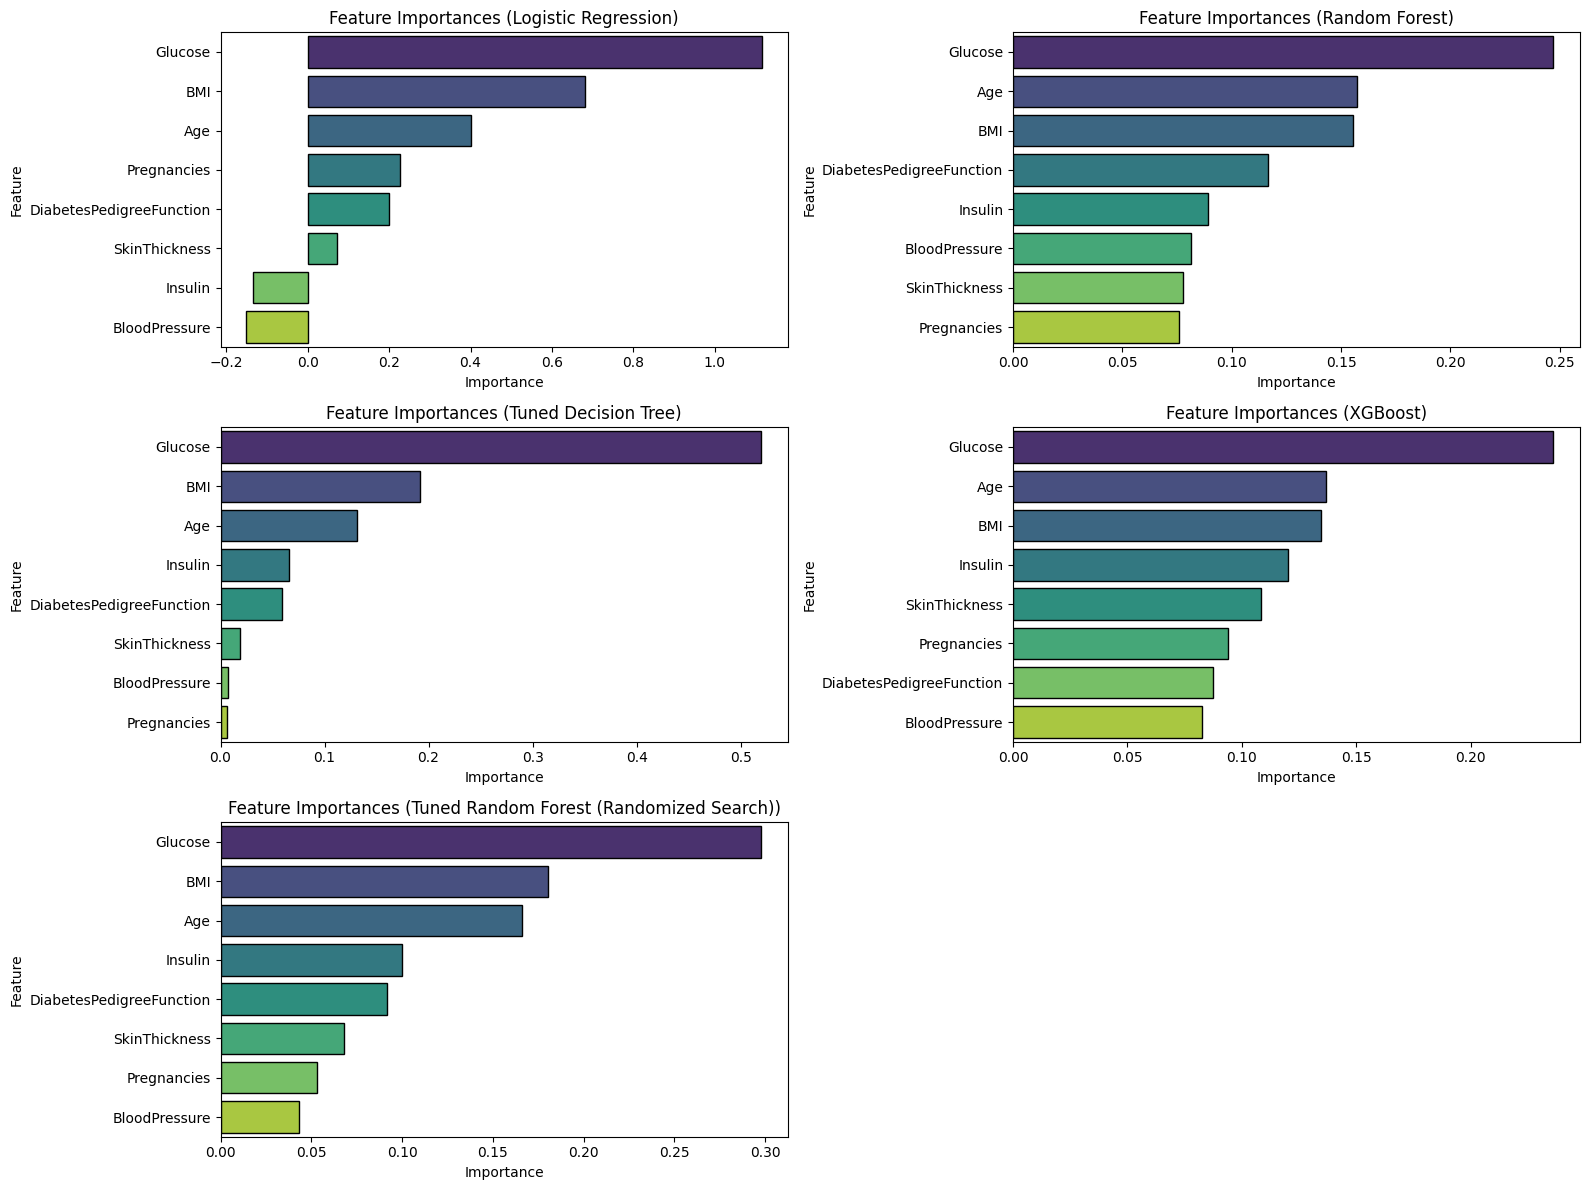

In [124]:
# Create DataFrames for feature importances
features = X.columns

importances_logreg_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_logreg})
importances_forest_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_forest})
importances_tuned_tree_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_tuned_tree})
importances_xgb_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_xgb})
importances_rs_forest_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rs_forest})

# List of importance dataframes and their corresponding model names
importance_dfs = [
    (importances_logreg_df, 'Logistic Regression'),
    (importances_forest_df, 'Random Forest'),
    (importances_tuned_tree_df, 'Tuned Decision Tree'),
    (importances_xgb_df, 'XGBoost'),
    (importances_rs_forest_df, 'Tuned Random Forest (Randomized Search)')]

# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(16,12))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot feature importances for each model in the grid
for i, (importance_df, model_name) in enumerate(importance_dfs):
    # Sort features by importance for better visualization
    sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Select the current axis
    ax = axes[i]

    # Create the bar plot on the current axis
    sns.barplot(x='Importance', y='Feature', data=sorted_importance_df, palette='viridis', ax=ax, edgecolor='black')
    ax.set_title(f'Feature Importances ({model_name})')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

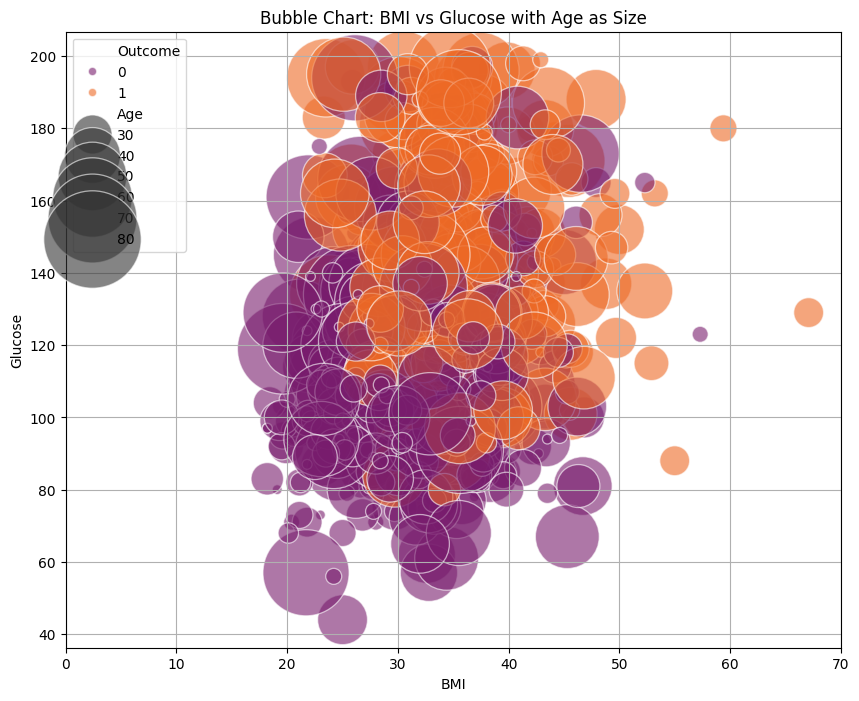

In [125]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='BMI', y='Glucose', size='Age', sizes=(50, 5000), alpha=0.6, hue='Outcome', palette='inferno')
plt.title('Bubble Chart: BMI vs Glucose with Age as Size')
plt.xlabel('BMI')
plt.xlim(0, 70)
plt.ylabel('Glucose')
plt.grid(True)
plt.show()

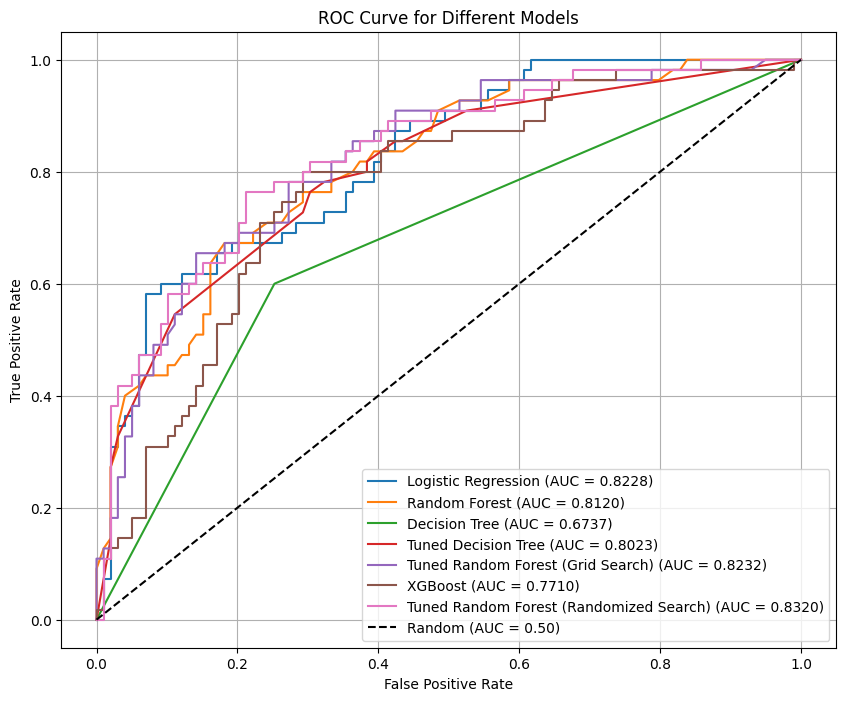

In [126]:
# Calculate ROC curves - the dashes are for the thresholds (which is not needed)
fpr_log, tpr_log, _ = roc_curve(y_test, log_prob) #False positive rate and true positive rate of Logistic Regression model
fpr_forest, tpr_forest, _ = roc_curve(y_test, forest_prob) #False positive rate and true positive rate of initial Random Forest model
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_prob) # False positive rate and true positive rate of initial Decision Tree model
fpr_tuned_tree, tpr_tuned_tree, _ = roc_curve(y_test, best_tree_prob) # False positive rate and true positive rate of tuned Decision Tree model
fpr_tuned_forest, tpr_tuned_forest, _ = roc_curve(y_test, best_forest_prob) #False positive rate and true positive rate of tuned Random Forest model
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob) #False positive rate and true positive rate of XGBoost model
fpr_rs_forest, tpr_rs_forest, _ = roc_curve(y_test, best_rs_forest_prob) #False positive rate and true positive rate of Random Forest model (using Randomized Search)

# Plot all ROC curves on one plot
plt.figure(figsize=(10, 8))

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_score_log:.4f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {auc_score_forest:.4f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_score_tree:.4f})')
plt.plot(fpr_tuned_tree, tpr_tuned_tree, label=f'Tuned Decision Tree (AUC = {auc_score_best_tree:.4f})')
plt.plot(fpr_tuned_forest, tpr_tuned_forest, label=f'Tuned Random Forest (Grid Search) (AUC = {auc_score_best_forest:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_score_xgb:.4f})')
plt.plot(fpr_rs_forest, tpr_rs_forest, label=f'Tuned Random Forest (Randomized Search) (AUC = {auc_score_best_rs_forest:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)') # Plots a dashed diagonal line from (0,0) to (1,1). This line represents the performance of a random classifier, which has an AUC of 0.50. Models performing better than random will have their ROC curves above this line.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [129]:
# Get classification report for each model
report_log = classification_report(y_test, log_preds, output_dict=True)
report_forest = classification_report(y_test, forest_preds, output_dict=True)
report_tree = classification_report(y_test, tree_preds, output_dict=True)
report_tuned_tree = classification_report(y_test, best_tree_preds, output_dict=True)
report_tuned_forest = classification_report(y_test, best_forest_preds, output_dict=True)
report_xgb = classification_report(y_test, xgb_preds, output_dict=True)
report_rs_forest = classification_report(y_test, best_rs_forest_preds, output_dict=True)

# Collect data for plotting
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Tuned Decision Tree', 'Tuned Random Forest (Grid Search)', 'XGBoost', 'Tuned Random Forest (Randomized Search)']

f1_class_0 = [
    report_log['0']['f1-score'],
    report_forest['0']['f1-score'],
    report_tree['0']['f1-score'],
    report_tuned_tree['0']['f1-score'],
    report_tuned_forest['0']['f1-score'],
    report_xgb['0']['f1-score'],
    report_rs_forest['0']['f1-score'],
]

f1_class_1 = [
    report_log['1']['f1-score'],
    report_forest['1']['f1-score'],
    report_tree['1']['f1-score'],
    report_tuned_tree['1']['f1-score'],
    report_tuned_forest['1']['f1-score'],
    report_xgb['1']['f1-score'],
    report_rs_forest['1']['f1-score'],
]


# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Model': models,
    'F1 Score (Class 0)': f1_class_0,
    'F1 Score (Class 1)': f1_class_1,
})

# Melt the DataFrame for easier plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
metrics_melted

Model              Metric     Score
0                       Logistic Regression  F1 Score (Class 0)  0.811881
1                             Random Forest  F1 Score (Class 0)  0.818182
2                             Decision Tree  F1 Score (Class 0)  0.758974
3                       Tuned Decision Tree  F1 Score (Class 0)  0.762431
4         Tuned Random Forest (Grid Search)  F1 Score (Class 0)  0.810256
5                                   XGBoost  F1 Score (Class 0)  0.791667
6   Tuned Random Forest (Randomized Search)  F1 Score (Class 0)  0.786885
7                       Logistic Regression  F1 Score (Class 1)  0.641509
8                             Random Forest  F1 Score (Class 1)  0.672727
9                             Decision Tree  F1 Score (Class 1)  0.584071
10                      Tuned Decision Tree  F1 Score (Class 1)  0.661417
11        Tuned Random Forest (Grid Search)  F1 Score (Class 1)  0.672566
12                                  XGBoost  F1 Score (Class 1)  0.655172
13  Tuned Random Forest (Randomized Search)  F1 Score (Class 1)  0.688000

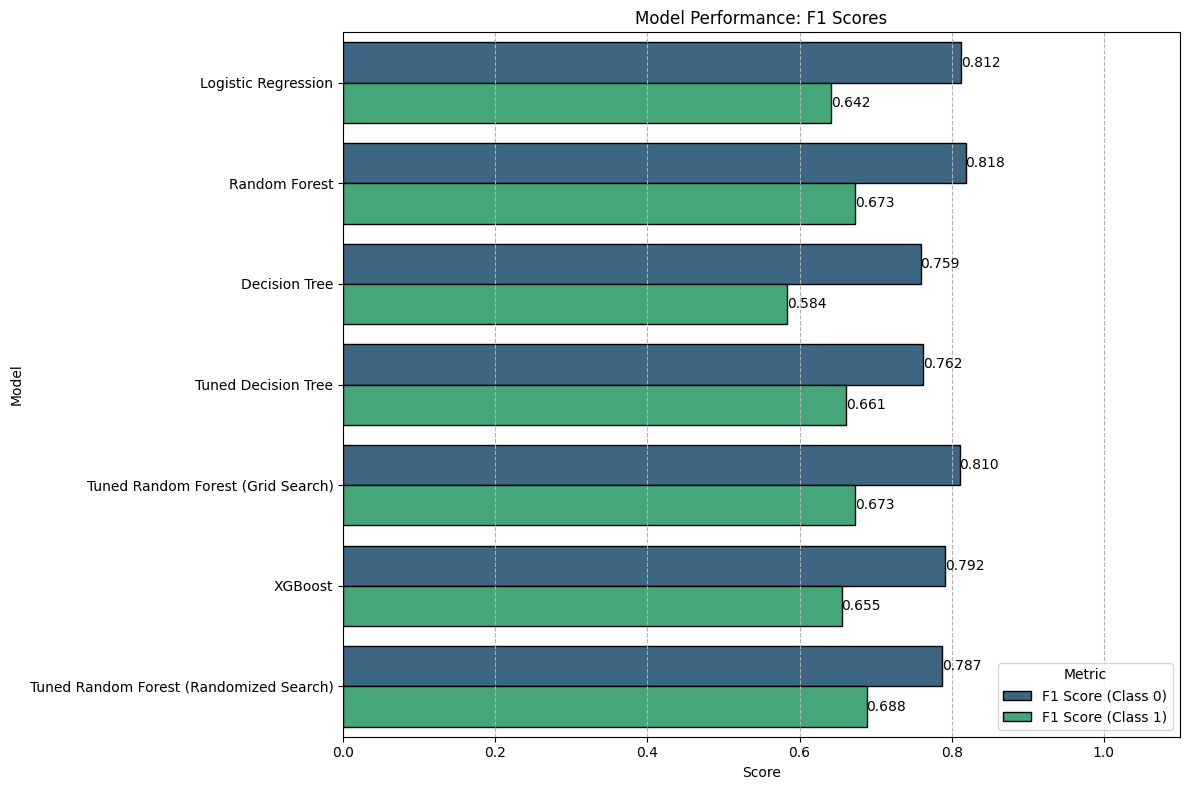

In [130]:
# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='Model', x='Score', hue='Metric', data=metrics_melted, palette='viridis', edgecolor='black')

plt.title('Model Performance: F1 Scores')
plt.xlabel('Score')
plt.ylabel('Model')
plt.xlim(0, 1.1) # Set x-axis limit from 0 to 1 for scores

# Add value labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge')

plt.legend(title='Metric')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


In [131]:
# Example patient data as a NumPy array
# The order of features were ensured to match the training data
# The features in the training data (X) were:
# ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Example patient data (replace with actual patient data)
# This is just a placeholder array with 8 values.
# You need to provide the actual patient data here.
patient_data_array = np.array([[2, 130, 70, 30, 128, 35.0, 0.82, 43]])

# Scale the patient data using the same scaler fitted on the training data
scaled_patient_data = scaler.transform(patient_data_array)

# Perform the prediction using the Randomized Search model
prediction = best_tree_model.predict(scaled_patient_data)

# The prediction result is a numpy array, access the first element
prediction_result = prediction[0]

# Interpret the prediction
if prediction_result == 1:
  print("Prediction: The patient is likely to have diabetes.")
else:
  print("Prediction: The patient is likely not to have diabetes.")

# Get the probability of each class
prediction_proba = best_rs_forest_model.predict_proba(scaled_patient_data)
print(f"Probability of no diabetes (Class 0): {prediction_proba[0][0]:.4f}")
print(f"Probability of diabetes (Class 1): {prediction_proba[0][1]:.4f}")

Prediction: The patient is likely to have diabetes.
Probability of no diabetes (Class 0): 0.1687
Probability of diabetes (Class 1): 0.8313
